# [NTDS'19] assignment 1: network science
[ntds'19]: https://github.com/mdeff/ntds_2019

[Eda Bayram](https://lts4.epfl.ch/bayram), [EPFL LTS4](https://lts4.epfl.ch) and
[Nikolaos Karalias](https://people.epfl.ch/nikolaos.karalias), [EPFL LTS2](https://lts2.epfl.ch).

## Students

* Team: `35`
* Students: `Gauthier Mueller, Couyoupetrou Julien, Renaud David, Barthe Lancelot`

## Rules

Grading:
* The first deadline is for individual submissions. The second deadline is for the team submission.
* All team members will receive the same grade based on the team solution submitted on the second deadline.
* As a fallback, a team can ask for individual grading. In that case, solutions submitted on the first deadline are graded.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

Submission:
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter.

## Objective

The purpose of this milestone is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you will analyze the network properties. In the second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

## Cora Dataset

The [Cora dataset](https://linqs.soe.ucsc.edu/node/236) consists of scientific publications classified into one of seven research fields. 

* **Citation graph:** the citation network can be constructed from the connections given in the `cora.cites` file.
* **Feature graph:** each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary and its research field, given in the `cora.content` file. The dictionary consists of 1433 unique words. A feature graph can be constructed using the Euclidean distance between the feature vector of the publications.

The [`README`](data/cora/README) provides details about the content of [`cora.cites`](data/cora/cora.cites) and [`cora.content`](data/cora/cora.content).

## Section 1: Network Properties

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### Question 1: Construct a Citation Graph and a Feature Graph

In [2]:
np.random.seed(100)

Read the `cora.content` file into a Pandas DataFrame by setting a header for the column names. Check the `README` file.

In [3]:
data_path = 'data/cora/'
readme_path = data_path + 'README'
def open_file(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()
    
readme = open_file(readme_path)

def get_columns(file=readme):
    columns = [column.strip('<').strip('+').strip('>') for column in readme[20:21][0].split()]
    return [columns[0]] + [i for i in range(1433)] + [columns[-1]]

In [4]:
column_list = get_columns()
pd_content = pd.read_csv('data/cora/cora.content', delimiter='\t', names=column_list) 
pd_content.head()

paper_id  0  1  2  3  4  5  6  7  8  ...  1424  1425  1426  1427  1428  \
0     31336  0  0  0  0  0  0  0  0  0  ...     0     0     1     0     0   
1   1061127  0  0  0  0  0  0  0  0  0  ...     0     1     0     0     0   
2   1106406  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
3     13195  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
4     37879  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   

   1429  1430  1431  1432             class_label  
0     0     0     0     0         Neural_Networks  
1     0     0     0     0           Rule_Learning  
2     0     0     0     0  Reinforcement_Learning  
3     0     0     0     0  Reinforcement_Learning  
4     0     0     0     0   Probabilistic_Methods  

[5 rows x 1435 columns]

In [5]:
pd_content['paper_id'].shape == pd_content['paper_id'].unique().shape

True

In [6]:
pd_content = pd_content.set_index('paper_id')

In [7]:
pd_content.head()

0  1  2  3  4  5  6  7  8  9  ...  1424  1425  1426  1427  1428  \
paper_id                                ...                                 
31336     0  0  0  0  0  0  0  0  0  0  ...     0     0     1     0     0   
1061127   0  0  0  0  0  0  0  0  0  0  ...     0     1     0     0     0   
1106406   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
13195     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
37879     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   

          1429  1430  1431  1432             class_label  
paper_id                                                  
31336        0     0     0     0         Neural_Networks  
1061127      0     0     0     0           Rule_Learning  
1106406      0     0     0     0  Reinforcement_Learning  
13195        0     0     0     0  Reinforcement_Learning  
37879        0     0     0     0   Probabilistic_Methods  

[5 rows x 1434 columns]

Print out the number of papers contained in each of the reasearch fields.

**Hint:** You can use the `value_counts()` function.

In [8]:
#Check if there are any null values
pd_content.isnull().sum().sum()

0

In [9]:
fields = list(pd_content['class_label'].unique())
fields

['Neural_Networks',
 'Rule_Learning',
 'Reinforcement_Learning',
 'Probabilistic_Methods',
 'Theory',
 'Genetic_Algorithms',
 'Case_Based']

In [10]:
# Your code here.
pd_content['class_label'].value_counts()

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: class_label, dtype: int64

Select all papers from a field of your choice and store their feature vectors into a NumPy array.
Check its shape.

In [11]:
my_field = 'Theory'
pd_features = pd_content[pd_content['class_label'] == my_field].drop('class_label', axis=1)
features = pd_features.values
features.shape

(351, 1433)

Let $D$ be the Euclidean distance matrix whose $(i,j)$ entry corresponds to the Euclidean distance between feature vectors $i$ and $j$.
Using the feature vectors of the papers from the field which you have selected, construct $D$ as a Numpy array. 

In [12]:
def compute_euclidean_distance(X):
    return  np.sqrt(-2 * np.dot(X, X.T) + np.sum(X**2, axis=1) + np.expand_dims(np.sum(X**2, axis=1), 1))

In [13]:
distance = compute_euclidean_distance(features)
distance.shape

(351, 351)

Check the mean pairwise distance $\mathbb{E}[D]$.

In [14]:
mean_distance = distance.mean()
mean_distance

5.748216300560453

Plot an histogram of the euclidean distances.

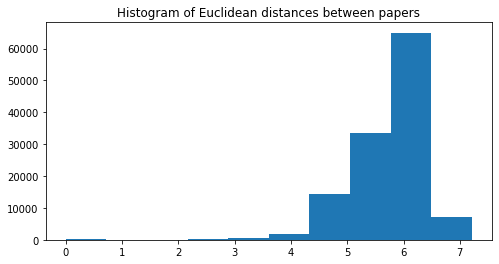

In [15]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between papers")
plt.hist(distance.flatten());

Now create an adjacency matrix for the papers by thresholding the Euclidean distance matrix.
The resulting (unweighted) adjacency matrix should have entries
$$ A_{ij} = \begin{cases} 1, \; \text{if} \; d(i,j)< \mathbb{E}[D], \; i \neq j, \\ 0, \; \text{otherwise.} \end{cases} $$

First, let us choose the mean distance as the threshold.

In [16]:
threshold = mean_distance

def make_A_feature(distance, threshold, lower_threshold=0):
    A_feature = ((lower_threshold <= distance) & (distance < threshold)).astype(int)
    np.fill_diagonal(A_feature, 0)
    return A_feature

A_feature = make_A_feature(distance, threshold)

Now read the `cora.cites` file and construct the citation graph by converting the given citation connections into an adjacency matrix.

In [17]:
def make_adj_matrix(nodes, edges, table):
    n_nodes = len(nodes)
    adjacency = np.zeros((n_nodes, n_nodes), dtype=int)
    for node1, node2 in edges:
        if np.isnan(node1):
            continue
        i, j = int(table.loc[node1].values[0]), int(table.loc[node2].values[0])
        adjacency[i, j] = 1
        adjacency[j, i] = 1
    return adjacency

In [18]:
cora_cites = np.genfromtxt('data/cora/cora.cites', delimiter='\t').astype(int)

In [19]:
def make_nodes_translation_table(edges):
    df_edges = pd.DataFrame(edges)
    unique_cited_paper_id = set(df_edges[0].unique())
    unique_citing_paper_id = set(df_edges[1].unique())
    nodes = unique_cited_paper_id.union(unique_citing_paper_id)
    nodes = sorted(list(nodes))
    table = pd.DataFrame(nodes).reset_index().set_index(0)
    return nodes, table

In [20]:
nodes, paper_id_table = make_nodes_translation_table(cora_cites)

In [21]:
A_citation = make_adj_matrix(nodes, cora_cites, paper_id_table)
A_citation.shape

(2708, 2708)

In [22]:
def make_matrix(A, table=paper_id_table, features=pd_features):
    df = pd.DataFrame(A).reset_index()
    df['index'] = table.index
    df = df.set_index('index')
    df = df[df.index.isin(features.index.values)]
    return df

In [23]:
df = make_matrix(A_citation)
df = make_matrix(df.values.T)

Get the adjacency matrix of the citation graph for the field that you chose.
You have to appropriately reduce the adjacency matrix of the citation graph.

In [24]:
A_citation_reduced = df.values

In [25]:
np.count_nonzero(A_citation_reduced - A_citation_reduced.transpose())

0

Check if your adjacency matrix is symmetric. Symmetrize your final adjacency matrix if it's not already symmetric.

In [26]:
# Your code here.
np.count_nonzero(A_citation - A_citation.transpose())

0

Check the shape of your adjacency matrix again.

In [27]:
A_citation.shape

(2708, 2708)

In [28]:
A_citation = A_citation_reduced
A_citation.shape

(351, 351)

### Question 2: Degree Distribution and Moments

What is the total number of edges in each graph?

In [29]:
def get_num_edges(A):
    return A.sum()//2

In [30]:
num_edges_feature = get_num_edges(A_feature)
num_edges_citation = get_num_edges(A_citation)
print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 25321
Number of edges in the citation graph: 534


Plot the degree distribution histogram for each of the graphs.

In [31]:
def get_degree(A):
    return A.sum(axis=0)

In [32]:
A_feature.shape

(351, 351)

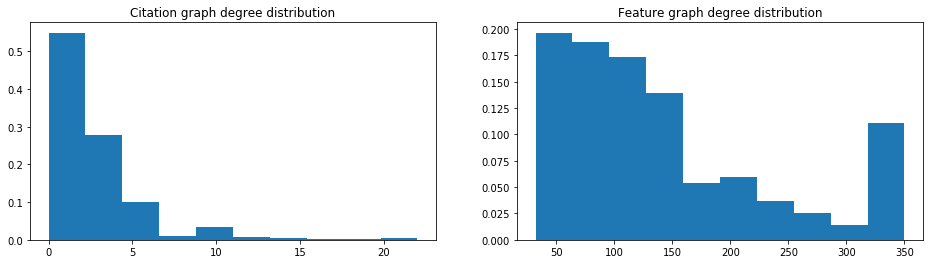

In [33]:
degrees_citation = get_degree(A_citation)
degrees_feature = get_degree(A_feature)

deg_hist_normalization = np.ones(degrees_citation.shape[0]) / degrees_citation.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(degrees_citation, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(degrees_feature, weights=deg_hist_normalization);

Calculate the first and second moments of the degree distribution of each graph.

In [34]:
def second_moment(array):
    return sum([i*i for i in array]) / len(array)

In [35]:
cit_moment_1 = degrees_citation.mean()
cit_moment_2 =second_moment(degrees_citation)

feat_moment_1 = degrees_feature.mean()
feat_moment_2 = second_moment(degrees_feature)

print(f"1st moment of citation graph: {cit_moment_1}")
print(f"2nd moment of citation graph: {cit_moment_2}")
print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

1st moment of citation graph: 3.0427350427350426
2nd moment of citation graph: 18.165242165242166
1st moment of feature graph: 144.27920227920228
2nd moment of feature graph: 29639.094017094016


What information do the moments provide you about the graphs?
Explain the differences in moments between graphs by comparing their degree distributions.

**
The first moment is the mean degree of the nodes. The second moment, with the first one, allows to compute the variance, and thus gives us information about the repartition of the values around the mean.
The feature graph has an higher density than the citation graph, thus the first moment and the variance of it's degrees are higher.
we can compute the variance of each degree distribution as $V(x)=m_2-m_1²$
we obtain $V_{feat}=8822.6$ and $V_{cit}=8.91$
**

In [36]:
cit_variance = degrees_citation.std()**2
feat_variance = degrees_feature.std()**2
print(f"Citation graph variance: {cit_variance}")
print(f"Feature graph variance: {feat_variance}")

Citation graph variance: 8.907005624954344
Feature graph variance: 8822.605806771051


Select the 20 largest hubs for each of the graphs and remove them. Observe the sparsity pattern of the adjacency matrices of the citation and feature graphs before and after such a reduction.

In [37]:
# largest indices
largest_hubs_feature = np.argpartition(A_feature.sum(axis=0), -20)[-20:]
largest_hubs_citation = np.argpartition(A_citation.sum(axis=0), -20)[-20:]
# remove column and then row
A_feature_reduced_rows = np.delete(A_feature, largest_hubs_feature, 0)
A_citation_reduced_rows = np.delete(A_citation, largest_hubs_citation, 0)

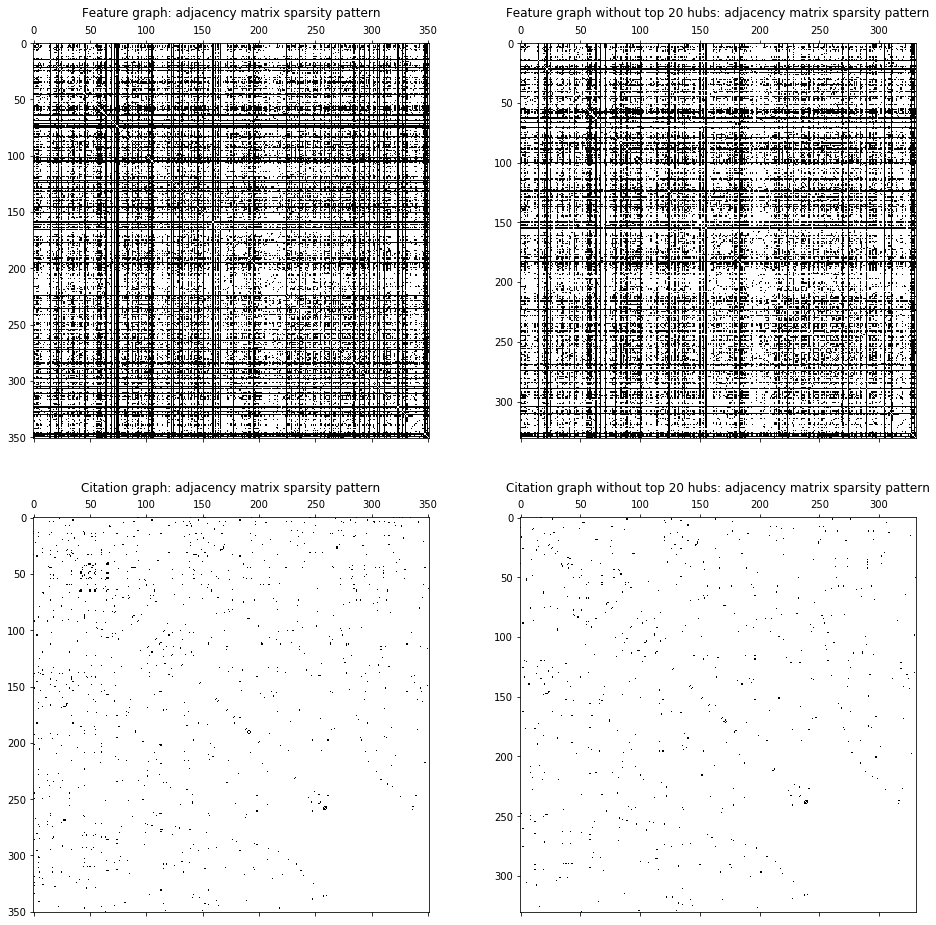

In [38]:
reduced_A_feature = np.delete(A_feature_reduced_rows, largest_hubs_feature, 1)
reduced_A_citation = np.delete(A_citation_reduced_rows, largest_hubs_citation, 1)

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].set_title('Feature graph: adjacency matrix sparsity pattern')
axes[0, 0].spy(A_feature);
axes[0, 1].set_title('Feature graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[0, 1].spy(reduced_A_feature);
axes[1, 0].set_title('Citation graph: adjacency matrix sparsity pattern')
axes[1, 0].spy(A_citation);
axes[1, 1].set_title('Citation graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[1, 1].spy(reduced_A_citation);

Plot the new degree distribution histograms.

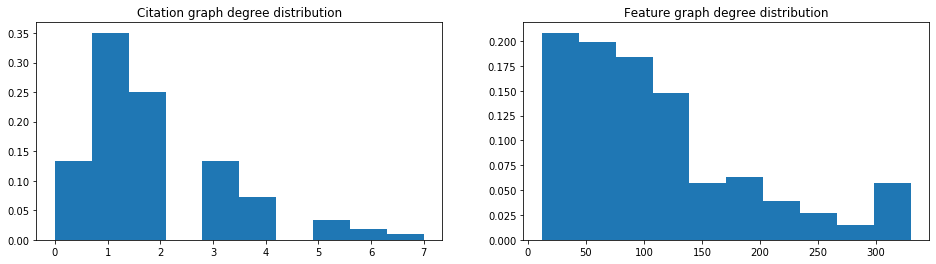

In [39]:
reduced_degrees_feat = get_degree(reduced_A_feature)
reduced_degrees_cit = get_degree(reduced_A_citation)

deg_hist_normalization = np.ones(reduced_degrees_feat.shape[0])/reduced_degrees_feat.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(reduced_degrees_cit, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(reduced_degrees_feat, weights=deg_hist_normalization);

Compute the first and second moments for the new graphs.

In [40]:
reduced_cit_moment_1 = reduced_degrees_cit.mean()
reduced_cit_moment_2 = second_moment(reduced_degrees_cit)

reduced_feat_moment_1 = reduced_degrees_feat.mean()
reduced_feat_moment_2 = second_moment(reduced_degrees_feat)


print("Citation graph first moment:", reduced_cit_moment_1)
print("Citation graph second moment:", reduced_cit_moment_2)
print("Feature graph first moment: ", reduced_feat_moment_1)
print("Feature graph second moment: ", reduced_feat_moment_2)

Citation graph first moment: 1.8791540785498488
Citation graph second moment: 5.637462235649547
Feature graph first moment:  111.8489425981873
Feature graph second moment:  19154.205438066467


Print the number of edges in the reduced graphs.

In [41]:
num_edges_reduced_feature = get_num_edges(reduced_A_feature)
num_edges_reduced_citation = get_num_edges(reduced_A_citation)
print(f"Number of edges in the reduced feature graph: {num_edges_reduced_feature}")
print(f"Number of edges in the reduced citation graph: {num_edges_reduced_citation}")

Number of edges in the reduced feature graph: 18511
Number of edges in the reduced citation graph: 311


In [42]:
def compute_percentage_change(n1, n2):
    #n1 is the start
    return 100 * (n1 - n2)/ n1

perc_edges_feature = compute_percentage_change(num_edges_feature, num_edges_reduced_feature)
perc_edges_cit = compute_percentage_change(num_edges_citation, num_edges_reduced_citation)

print(f"Percentage change of number of edges in the reduced feature graph: {perc_edges_feature}")
print(f"Percentage change of number of edges in the reduced citation graph: {perc_edges_cit}")
print("percentage change of feature moments")
print("")
perc_first_feature = compute_percentage_change(feat_moment_1, reduced_feat_moment_1)
perc_second_feature = compute_percentage_change(feat_moment_2, reduced_feat_moment_2)
print(f"Percentage change of first moment: {perc_first_feature}")
print(f"Percentage change of second moment: {perc_second_feature}")
print("")
print("percentage change of citation moments")
perc_first_cit = compute_percentage_change(cit_moment_1, reduced_cit_moment_1)
perc_second_cit = compute_percentage_change(cit_moment_2, reduced_cit_moment_2)
print(f"Percentage change of number of edges in the reduced feature graph: {perc_first_cit}")
print(f"Percentage change of number of edges in the reduced citation graph: {perc_second_cit}")

Percentage change of number of edges in the reduced feature graph: 26.89467240630307
Percentage change of number of edges in the reduced citation graph: 41.760299625468164
percentage change of feature moments

Percentage change of first moment: 22.47743206831534
Percentage change of second moment: 35.37519929921106

percentage change of citation moments
Percentage change of number of edges in the reduced feature graph: 38.241284497097666
Percentage change of number of edges in the reduced citation graph: 68.96566429245622


Is the effect of removing the hubs the same for both networks? Look at the percentage changes for each moment. Which of the moments is affected the most and in which graph? Explain why.  

**Hint:** Examine the degree distributions.

**The effect of removing the 20 biggest hubs is different for feature and citations. It is possible to see the percentage changes for each moment above.
In citation, there are very few nodes with a degree higher than 7. Removing the 20 higest hubs thus removes all the extreme values between 7 and 20, which are squared in the computation of the second moment. As we removed all these extreme values squared which where predominant, we had a big impact on the second moment (68 percent of change).
In feature, there are a lot of hubs (in reality, there are more than 20 hubs that are connected to every nodes). As we can see from the distribution by removing the 20 bigger components we still have a lot of high degrees nodes which are predominant in the computation of the second moment, thus the second moment varies less in percentage than in the citation.**

### Question 3: Pruning, sparsity, paths

By adjusting the threshold of the euclidean distance matrix, prune the feature graph so that its number of edges is roughly close (within a hundred edges) to the number of edges in the citation graph.

In [43]:
def get_thresholds(distance, mean=mean_distance, num_edges_citation=num_edges_citation, tol=100, eps=0.1, max_iter=1000, want_lower=False):
    # want_lower -> if it is acceptable to remove very similar papers
    upper = mean
    lower = 0

    min_dist = 2**64-1
    best_value_upper = mean
    best_value_lower = lower
    it = 0
    while it < max_iter and upper > eps:
       
        num_edges_feature = get_num_edges(make_A_feature(distance, upper, lower))
        current_dist = np.abs(num_edges_feature - num_edges_citation)
        
        if (min_dist >= current_dist):
            min_dist = current_dist
            best_value_upper = upper
            
        upper -= eps
        it += 1
    
    # lower = 0
    if (min_dist < tol):
        return best_value_upper, best_value_lower
    
    if (want_lower):
        it = 0
        while lower < upper and it < max_iter:
            num_edges_feature = get_num_edges(make_A_feature(distance, upper, lower))
            current_dist = np.abs(num_edges_feature - num_edges_citation)

            if (min_dist >= current_dist):
                min_dist = current_dist
                best_value_lower = lower

            it += 1
            lower += eps

        if (min_dist < tol):
            return (best_value_upper, best_value_lower)
    else:
        raise Exception("Thresholds not found")
    

In [44]:
threshold_up, threshold_low = get_thresholds(distance) # Your code here

A_feature_pruned = make_A_feature(distance, threshold_up, threshold_low)
num_edges_feature_pruned = get_num_edges(A_feature_pruned)

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the feature graph after pruning: {num_edges_feature_pruned}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 25321
Number of edges in the feature graph after pruning: 497
Number of edges in the citation graph: 534


Check your results by comparing the sparsity patterns and total number of edges between the graphs.

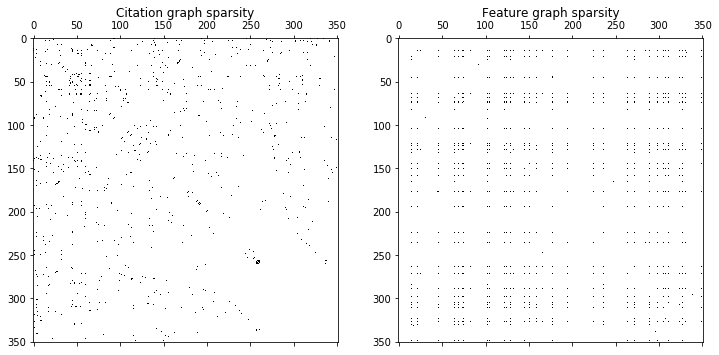

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Citation graph sparsity')
axes[0].spy(A_citation);
axes[1].set_title('Feature graph sparsity')
axes[1].spy(A_feature_pruned);

Let $C_{k}(i,j)$ denote the number of paths of length $k$ from node $i$ to node $j$. 

We define the path matrix $P$, with entries
$ P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j). $

Calculate the path matrices for both the citation and the unpruned feature graphs for $N =10$.  

**Hint:** Use [powers of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers).

In [46]:
def power(A, k):   
    A_iteration = np.eye(A.shape[0])
    
    for i in range(k):
        A_iteration = A@A_iteration
    return A_iteration

def make_path_matrix(A, p):
    A_current = np.eye(A.shape[0])
    
    for i in range(1, p+1):
        A_current += power(A, i)
    
    return A_current        

In [47]:
N = 10
path_matrix_citation = make_path_matrix(A_citation, N)
path_matrix_feature = make_path_matrix(A_feature, N)

Check the sparsity pattern for both of path matrices.

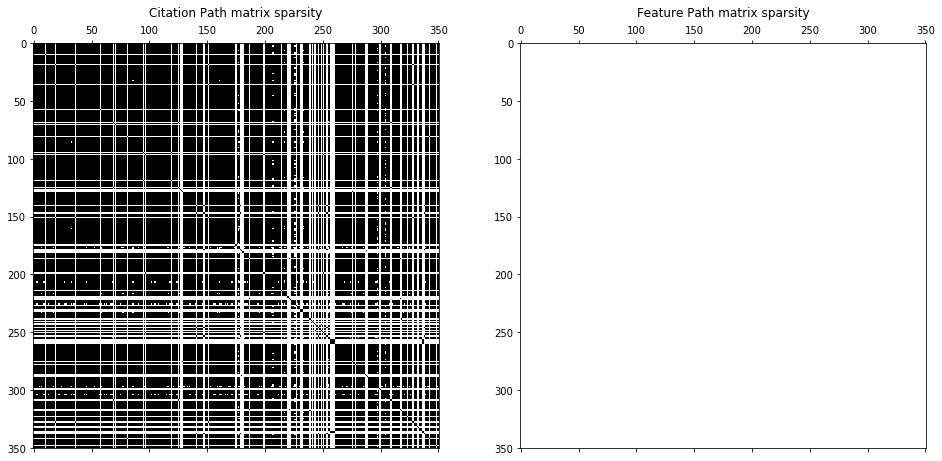

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title('Citation Path matrix sparsity')
axes[0].spy(path_matrix_citation);
axes[1].set_title('Feature Path matrix sparsity')
axes[1].spy(path_matrix_feature);

Now calculate the path matrix of the pruned feature graph for $N=10$. Plot the corresponding sparsity pattern. Is there any difference?

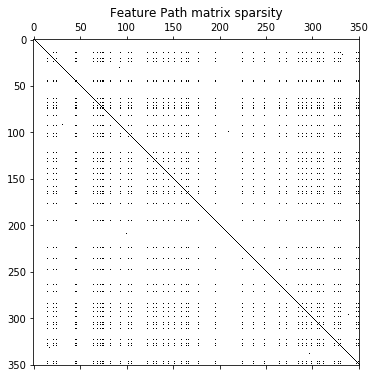

In [49]:
path_matrix_pruned = make_path_matrix(A_feature_pruned, N)

plt.figure(figsize=(12, 6))
plt.title('Feature Path matrix sparsity')
plt.spy(path_matrix_pruned);

**
Yes, there is. The full path matrix is all non zeros while the pruned one is not.**

Describe how you can use the above process of counting paths to determine whether a graph is connected or not. Is the original (unpruned) feature graph connected?

**We can find if a graph is connected by computing the path matrix for N=n-1, where n is the number of nodes. If the path matrix is all non zero then we know that the graph is connected.** 

**The original feature graph is all connected because the sparsity matrix is completely white.**

If the graph is connected, how can you guess its diameter using the path matrix?

**
Take the first power of the path matrix such that there are no zeros in the matrix.
**

If any of your graphs is connected, calculate the diameter using that process.

In [50]:
def find_diameter(A, k=100):
    if (~np.any(A, axis=1)).any():
        return "Graph is not connected!"
    for i in range(k):
        path_matrix = make_path_matrix(A, i)
        if np.all(path_matrix, axis=1).all():
            return i

In [51]:
diameter = find_diameter(A_feature)
print(f"The diameter is: {diameter}")

The diameter is: 2


Check if your guess was correct using [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html).
Note: usage of NetworkX is only allowed in this part of Section 1.

In [52]:
import networkx as nx
feature_graph = nx.from_numpy_matrix(A_feature)
print(f"Diameter according to networkx: {nx.diameter(feature_graph)}")

Diameter according to networkx: 2


## Section 2: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below.

In [53]:
import networkx as nx

Let us create NetworkX graph objects from the adjacency matrices computed in the previous section.

In [54]:
G_citation = nx.from_numpy_matrix(A_citation)
print('Number of nodes: {}, Number of edges: {}'. format(G_citation.number_of_nodes(), G_citation.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_citation.number_of_selfloops(), nx.number_connected_components(G_citation)))

Number of nodes: 351, Number of edges: 534
Number of self-loops: 0, Number of connected components: 36


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [55]:
G_feature = nx.from_numpy_matrix(A_feature_pruned)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_feature.number_of_selfloops(), nx.number_connected_components(G_feature)))

Number of nodes: 351, Number of edges: 497
Number of self-loops: 0, Number of connected components: 304


### Question 4: Simulation with Erdős–Rényi and Barabási–Albert models

Create an Erdős–Rényi and a Barabási–Albert graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [56]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

351

The number of match shall fit the average of the number of edges in the citation and the feature graph.

In [57]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

516.0

How do you determine the probability parameter for the Erdős–Rényi graph?

**
We can either do $p = m \cdot \frac{2}{n(n-1)}$
**

** or $p = \frac{<k>}{n-1}$ where $<k> = 2\frac{m}{n}$**

In [58]:
def pick_p_er(N, E):
    return (E * 2) /(N*(N-1))
def pick_p(N=n, E=m):
    return (2*m/n) / (n-1)

In [59]:
p = pick_p(n,m)
G_er = nx.erdos_renyi_graph(n, p)

Check the number of edges in the Erdős–Rényi graph.

In [60]:
print('My Erdos-Rényi network that simulates the citation graph has {} edges.'.format(G_er.size()))

My Erdos-Rényi network that simulates the citation graph has 553 edges.


How do you determine the preferential attachment parameter for Barabási–Albert graphs?

**
We can either compute based on the following system N = t + m_0, and L = m_0 + mt, where m is our q
**

** or $q = \frac{<k>}{2} = \frac{m}{n}$ where $<k> = 2\frac{m}{n}$**

In [61]:
def pick_q_alt(N, E):
    b = -(N+1)
    delta = np.sqrt(b*b - 4*m)
    q1 = (-b - delta)/2
    q2 = (-b + delta)/2
    
    if q1 > 0 and q1 < 818:
        q = q1
    else:
        if q2 > 0 and q2 < 818:
            q = q2
        else:
            raise Exception
    return int(q)

def pick_q(N=n, E=m):
    return int(E/N)

In [62]:
q = pick_q(n, m)
G_ba = nx.barabasi_albert_graph(n, q)

Check the number of edges in the Barabási–Albert graph.

In [63]:
print('My Barabási-Albert network that simulates the citation graph has {} edges.'.format(G_ba.size()))

My Barabási-Albert network that simulates the citation graph has 350 edges.


### Question 5: Giant Component

Check the size of the largest connected component in the citation and feature graphs.

In [64]:
giant_citation = max(nx.connected_component_subgraphs(G_citation), key=len)
print('The giant component of the citation graph has {} nodes and {} edges.'.format(giant_citation.number_of_nodes(), giant_citation.size()))

The giant component of the citation graph has 287 nodes and 499 edges.


In [65]:
giant_feature = max(nx.connected_component_subgraphs(G_feature), key=len)
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))

The giant component of the feature graph has 44 nodes and 493 edges.


Check the size of the giant components in the generated Erdős–Rényi graph.

In [66]:
giant_er = max(nx.connected_component_subgraphs(G_er), key=len)
print('The giant component of the Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er.number_of_nodes(), giant_er.size()))

The giant component of the Erdos-Rényi network has 338 nodes and 552 edges.


Let us match the number of nodes in the giant component of the feature graph by simulating a new Erdős–Rényi network.
How do you choose the probability parameter this time? 

**Hint:** Recall the expected giant component size from the lectures.

** We can use the expected giant component size which can be found on the lecture slides: p = 1/(n-1) **

**or**

**
$ u = (1 - p + pu)^{N-1} $, where $u$ is the proportion of nodes which are not in the giant component.**

**
Thus $p= \frac{e^{\frac{\ln{u}}{N-1}} - 1}{u - 1}$.
**

In [67]:
def pick_p_gc(N=n, E=m):
    u = (G_feature.number_of_nodes() - giant_feature.number_of_nodes()) / G_feature.number_of_nodes()
    return (np.exp(np.log(u) / (n - 1)) -1) / (u-1)

def pick_p_approx(N=n):
    return 1 / (N - 1)

In [68]:
p_new = pick_p_gc()
G_er_new = nx.erdos_renyi_graph(n, p_new)

Check the size of the new Erdős–Rényi network and its giant component.

In [69]:
print('My new Erdos Renyi network that simulates the citation graph has {} edges.'.format(G_er_new.size()))
giant_er_new = max(nx.connected_component_subgraphs(G_er_new), key=len)
print('The giant component of the new Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network that simulates the citation graph has 174 edges.
The giant component of the new Erdos-Rényi network has 45 nodes and 44 edges.


### Question 6: Degree Distributions

Recall the degree distribution of the citation and the feature graph.

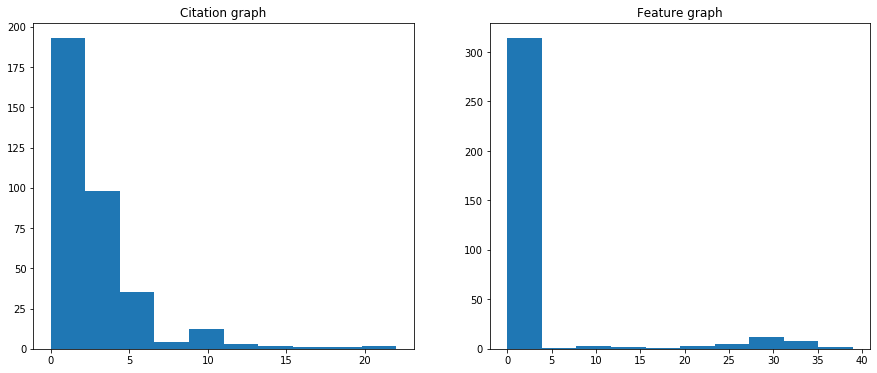

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Citation graph')
citation_degrees = get_degree(A_citation)
axes[0].hist(citation_degrees);
axes[1].set_title('Feature graph')
feature_degrees = get_degree(A_feature_pruned)
axes[1].hist(feature_degrees);

What does the degree distribution tell us about a network? Can you make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions?

**The degree distribution tells us about the repartition of the degrees of the nodes in a graph. As each model gives a predictible repartition function, we can predict which model will fit best the citation and the feature graph.**

**As seen in the lecture, the BA model tends to connect a node to high degree existing node. The ER model connects pairs indipendetely of their size. Thus, from the degree distribution of the feature graph we think the BA model is going to fit better because a lot of nodes have a low degree but there are some big hubs, while for the citation graph the ER model could fit because the distribution of degrees looks like the right half of a gaussian distribution. 
**

Now, plot the degree distribution historgrams for the simulated networks.

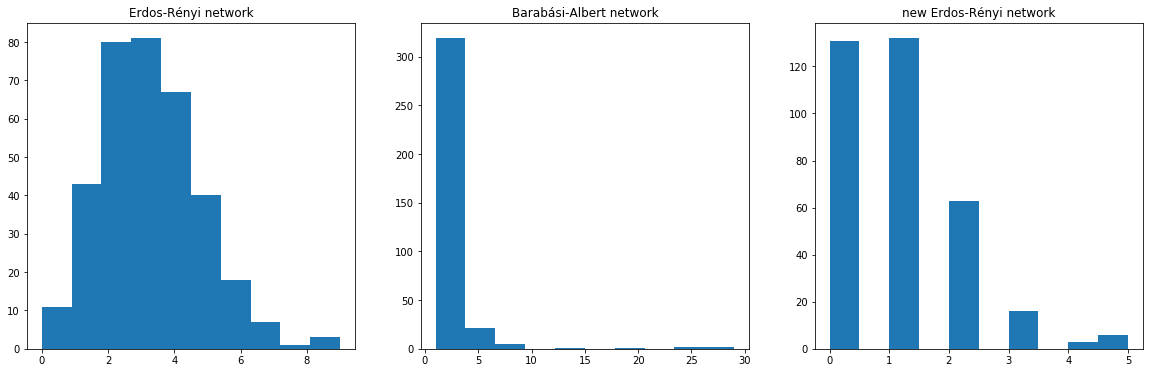

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].set_title('Erdos-Rényi network')
er_degrees = get_degree(nx.to_numpy_array(G_er))
axes[0].hist(er_degrees);
axes[1].set_title('Barabási-Albert network')
ba_degrees = get_degree(nx.to_numpy_array(G_ba))
axes[1].hist(ba_degrees);
axes[2].set_title('new Erdos-Rényi network')
er_new_degrees = get_degree(nx.to_numpy_array(G_er_new))
axes[2].hist(er_new_degrees);

In terms of the degree distribution, is there a good match between the citation and feature graphs and the simulated networks?
For the citation graph, choose one of the simulated networks above that match its degree distribution best. Indicate your preference below.

**Note that the scale of the plot is not the same.**

** As predicted the model that fits better the citation graph based on degree distribution is the ER model while for the feature graph it is the BA model. 
**

You can also simulate a network using the configuration model to match its degree disctribution exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).

Let us create another network to match the degree distribution of the feature graph. 

In [72]:
G_config = nx.configuration_model(feature_degrees) 
print('Configuration model has {} nodes and {} edges.'.format(G_config.number_of_nodes(), G_config.size()))

Configuration model has 351 nodes and 497 edges.


Does it mean that we create the same graph with the feature graph by the configuration model? If not, how do you understand that they are not the same?

**
No, we do not create the same. We have the same repartition distribution but the edges are not necessarily connected between the same nodes. We can further check the adjecency matrix representation and see that they are different indeed.
**

In [73]:
(nx.to_numpy_array(G_config) == A_feature_pruned).all()

False

### Question 7: Clustering Coefficient

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [74]:
nx.average_clustering(G_citation)

0.19443820911432247

In [75]:
nx.average_clustering(G_feature)

0.09794964186122143

What does the clustering coefficient tell us about a network? Comment on the values you obtain for the citation and feature graph.

**Clustering coefficient measures the proportion of connected nodes in the neighbourhood of a node and hence it can also give an insight of the graph's sparsity.
The feature graph's clustering coefficient is almost half of the citation one, because most of the nodes have very low degree and only a few hubs, thus the neighbours are not connected. Instead the citation graph has a similar degree distribution to the random model ER but the clustering shows that the connection between the nodes are not random, since connected papers are using the same words the neighbours of a given node have high probability to use the same words.**

In [76]:
# check the custom model for citation graph 
G_config_cit = nx.configuration_model(citation_degrees) 
print('Configuration model has {} nodes and {} edges.'.format(G_config_cit.number_of_nodes(), G_config_cit.size()))

Configuration model has 351 nodes and 534 edges.


In [77]:
nx.average_clustering(nx.Graph(G_config_cit))

0.011561792117347671

Now, let us check the average clustering coefficient for the simulated networks.

In [78]:
nx.average_clustering(G_er)

0.004978971645638312

In [79]:
nx.average_clustering(G_ba)

0.0

In [80]:
nx.average_clustering(nx.Graph(G_config))

0.058475833045462576

Comment on the values you obtain for the simulated networks. Is there any good match to the citation or feature graph in terms of clustering coefficient?

**The ER model has a clustering coefficient close to the probability p of connecting a pair of nodes.
The BA model has a clustering coefficient of zero, because in our case, q is equal to 1, and hence each neighbour can not be connected to the other nodes.
For the model based on the degree distribution of the feature graph, the clustering coefficient is the closest to the true feature's clustering coefficient.
No good approximation for the citation graph.**

Check the other [network model generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html) provided by NetworkX. Which one do you predict to have a better match to the citation graph or the feature graph in terms of degree distribution and clustering coefficient at the same time? Justify your answer.

** By checking the graph's plot, we realized that the feautre graph has a high density in the giant component and almost 0 degrees everywhere else. Hence, we think that the Erdos-Rényi with high connecting probability p, is going to model the giant component very well, meanwhile the empty graph (without edges) will model all the nodes which do not belong to the giant component.**

**
The citation graph's plot has more nodes in the giant component, which makes us believe that a good model could be a power law clustering graph, especially given the above mentioned average clustering of approximately 0.2. A power law clusering graph improves the clustering with respect to barabasi albert model. Taken from networkx: "It is essentially the Barabási–Albert (BA) growth model with an extra step that each random edge is followed by a chance of making an edge to one of its neighbors too (and thus a triangle)."
**

In [81]:
def plot_degree_distribution_clustering(G, title, bin_size=1, normalized=70):
    print("Clustering coefficient: ", nx.average_clustering(G))
    print("Number of edges: ", G.size())
    fig, axes = plt.subplots(1, 1, figsize=(20, 6))
    axes.set_title(f'{title}')
    degrees = get_degree(nx.to_numpy_array(G))
    max_degree = max(dict(G.degree).values())
#     plt.xticks(np.arange(0, normalized, 1.0))
    axes.set_xlim(0, normalized)
    axes.hist(degrees,bins=int(max_degree/bin_size))
    
def plot_graph(G, size=(65,45)):
    plt.figure(1,figsize=size) 
    nx.draw_networkx(G)
    plt.show()

If you find a better fit, create a graph object below for that network model. Print the number of edges and the average clustering coefficient. Plot the histogram of the degree distribution.

### Feature Graph

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


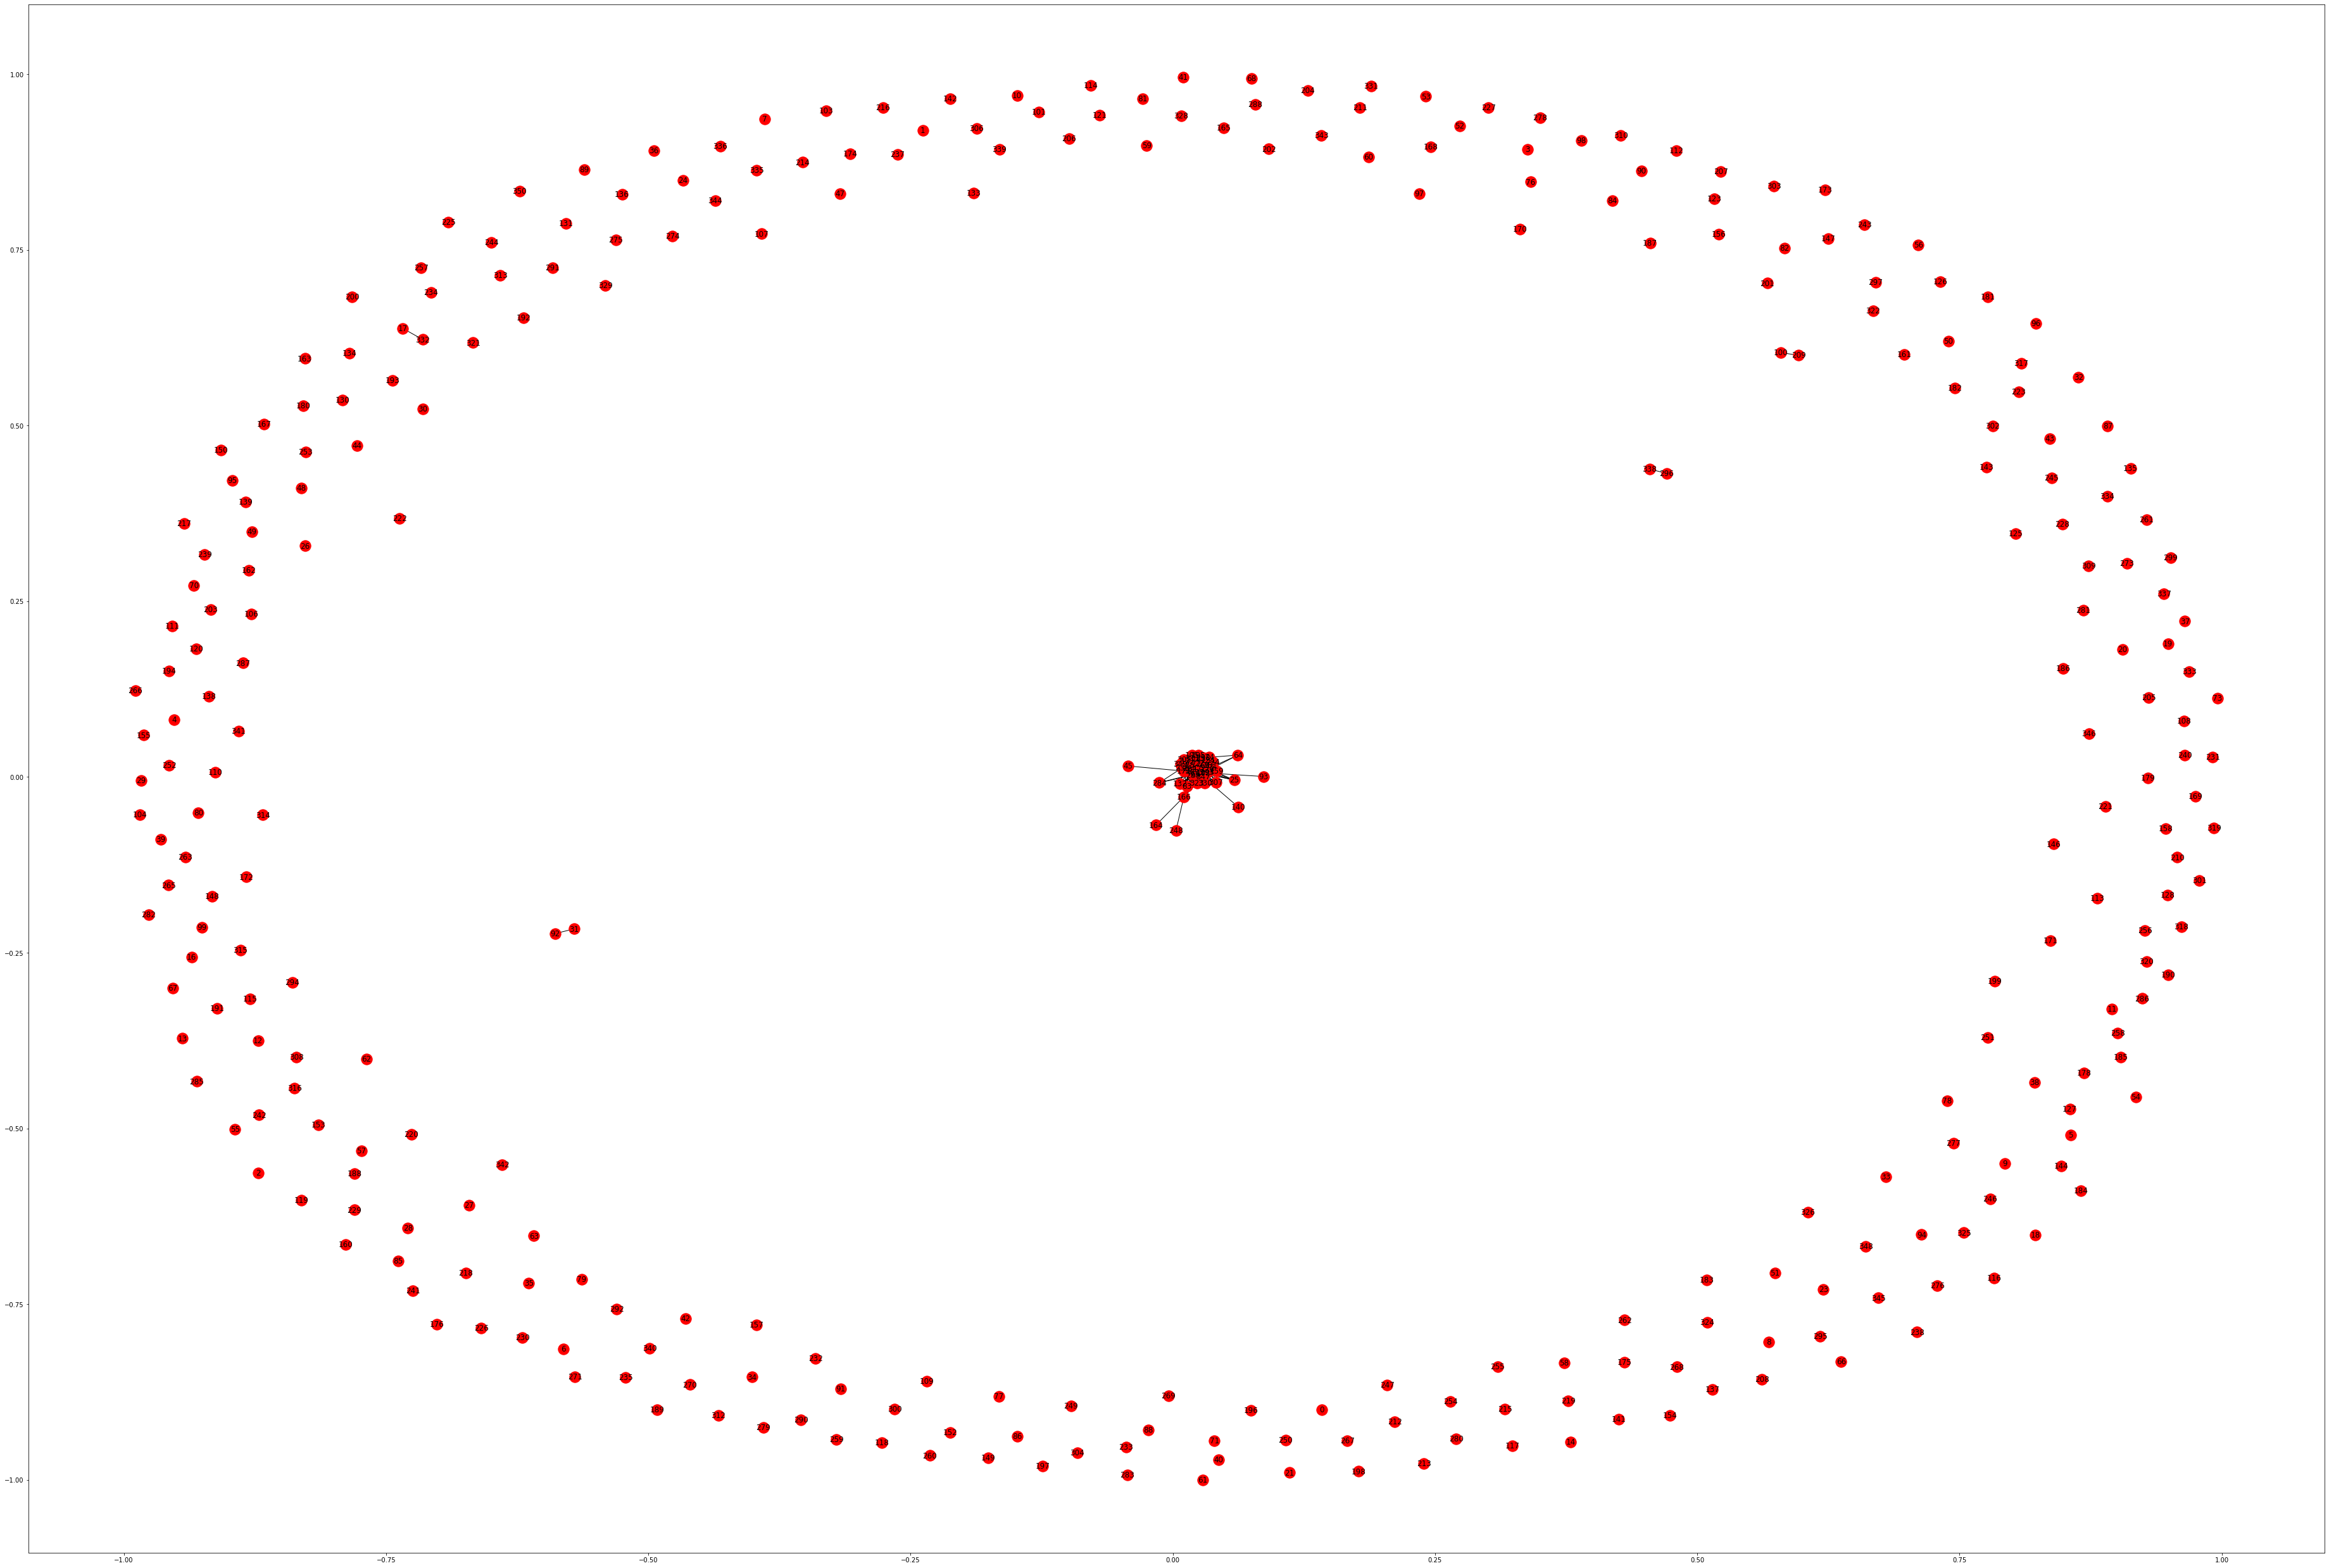

In [82]:
plot_graph(G_feature)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


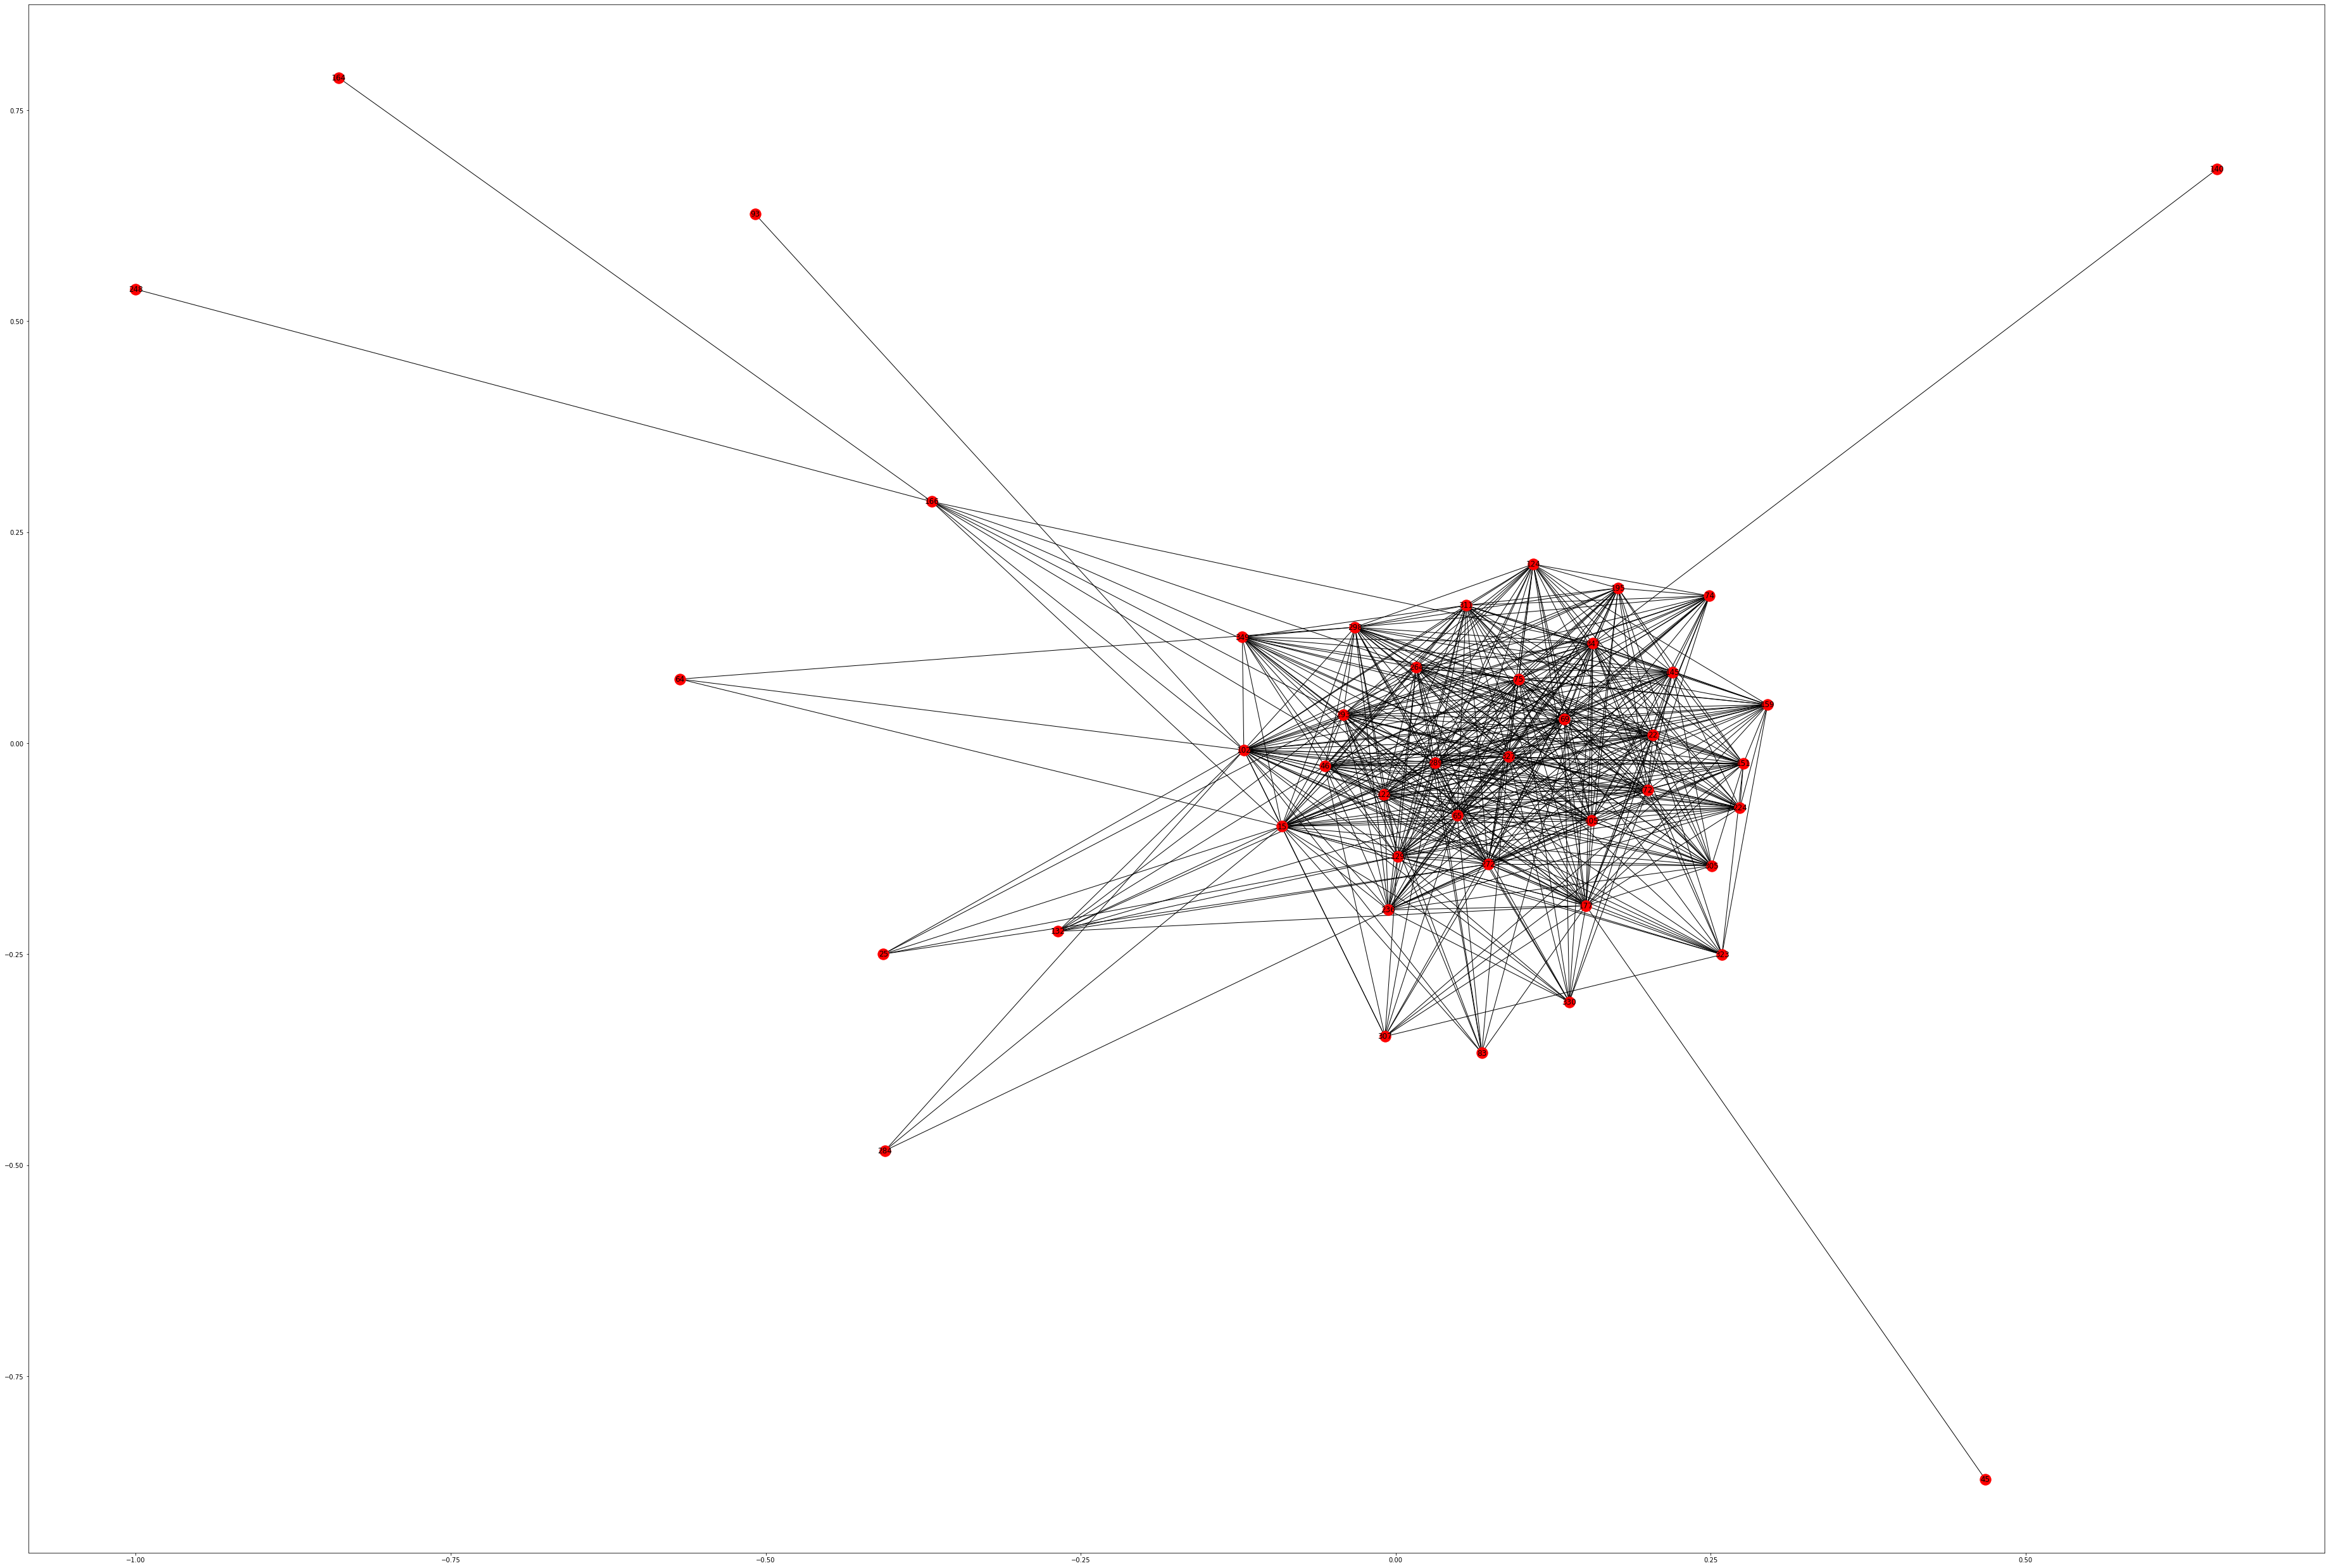

In [83]:
plot_graph(giant_feature)

In [84]:
def better_model_for_feature():
    G_empty = nx.empty_graph(G_feature.number_of_nodes() - giant_feature.number_of_nodes())
    G_erfeature = nx.erdos_renyi_graph(giant_feature.number_of_nodes(), 0.6)
    G_union = nx.union(G_empty, G_erfeature, rename=("e", "er"))
    return G_union

Clustering coefficient:  0.07632880712546133
Number of edges:  566


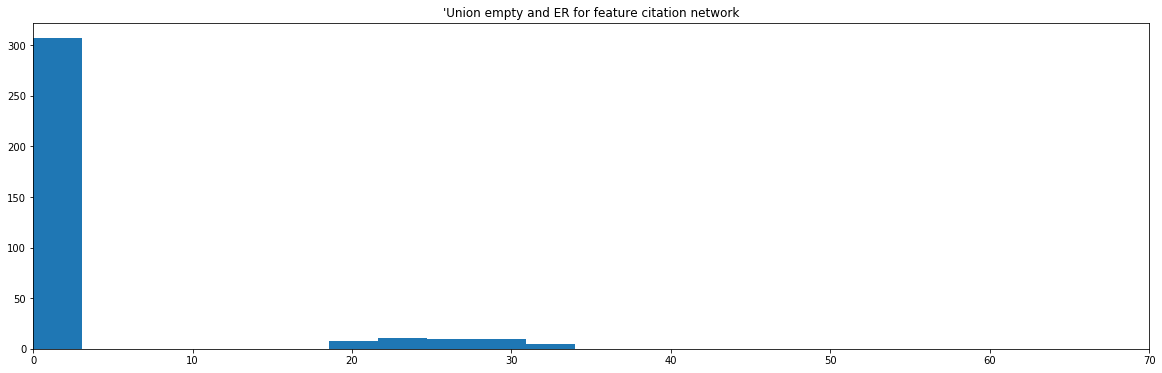

In [85]:
G_union_feature = better_model_for_feature()
plot_degree_distribution_clustering(G_union_feature, "'Union empty and ER for feature citation network", bin_size=3)

Clustering coefficient:  0.09794964186122143
Number of edges:  497


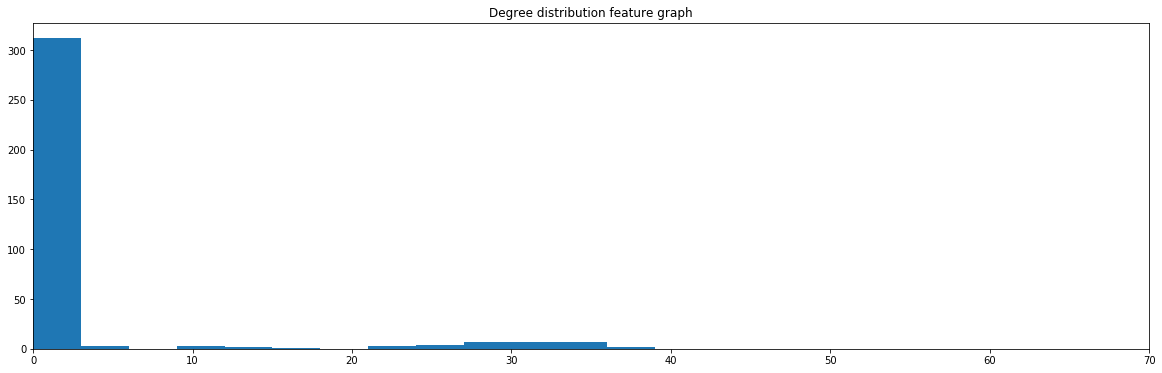

In [86]:
plot_degree_distribution_clustering(G_feature, "Degree distribution feature graph", bin_size=3)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


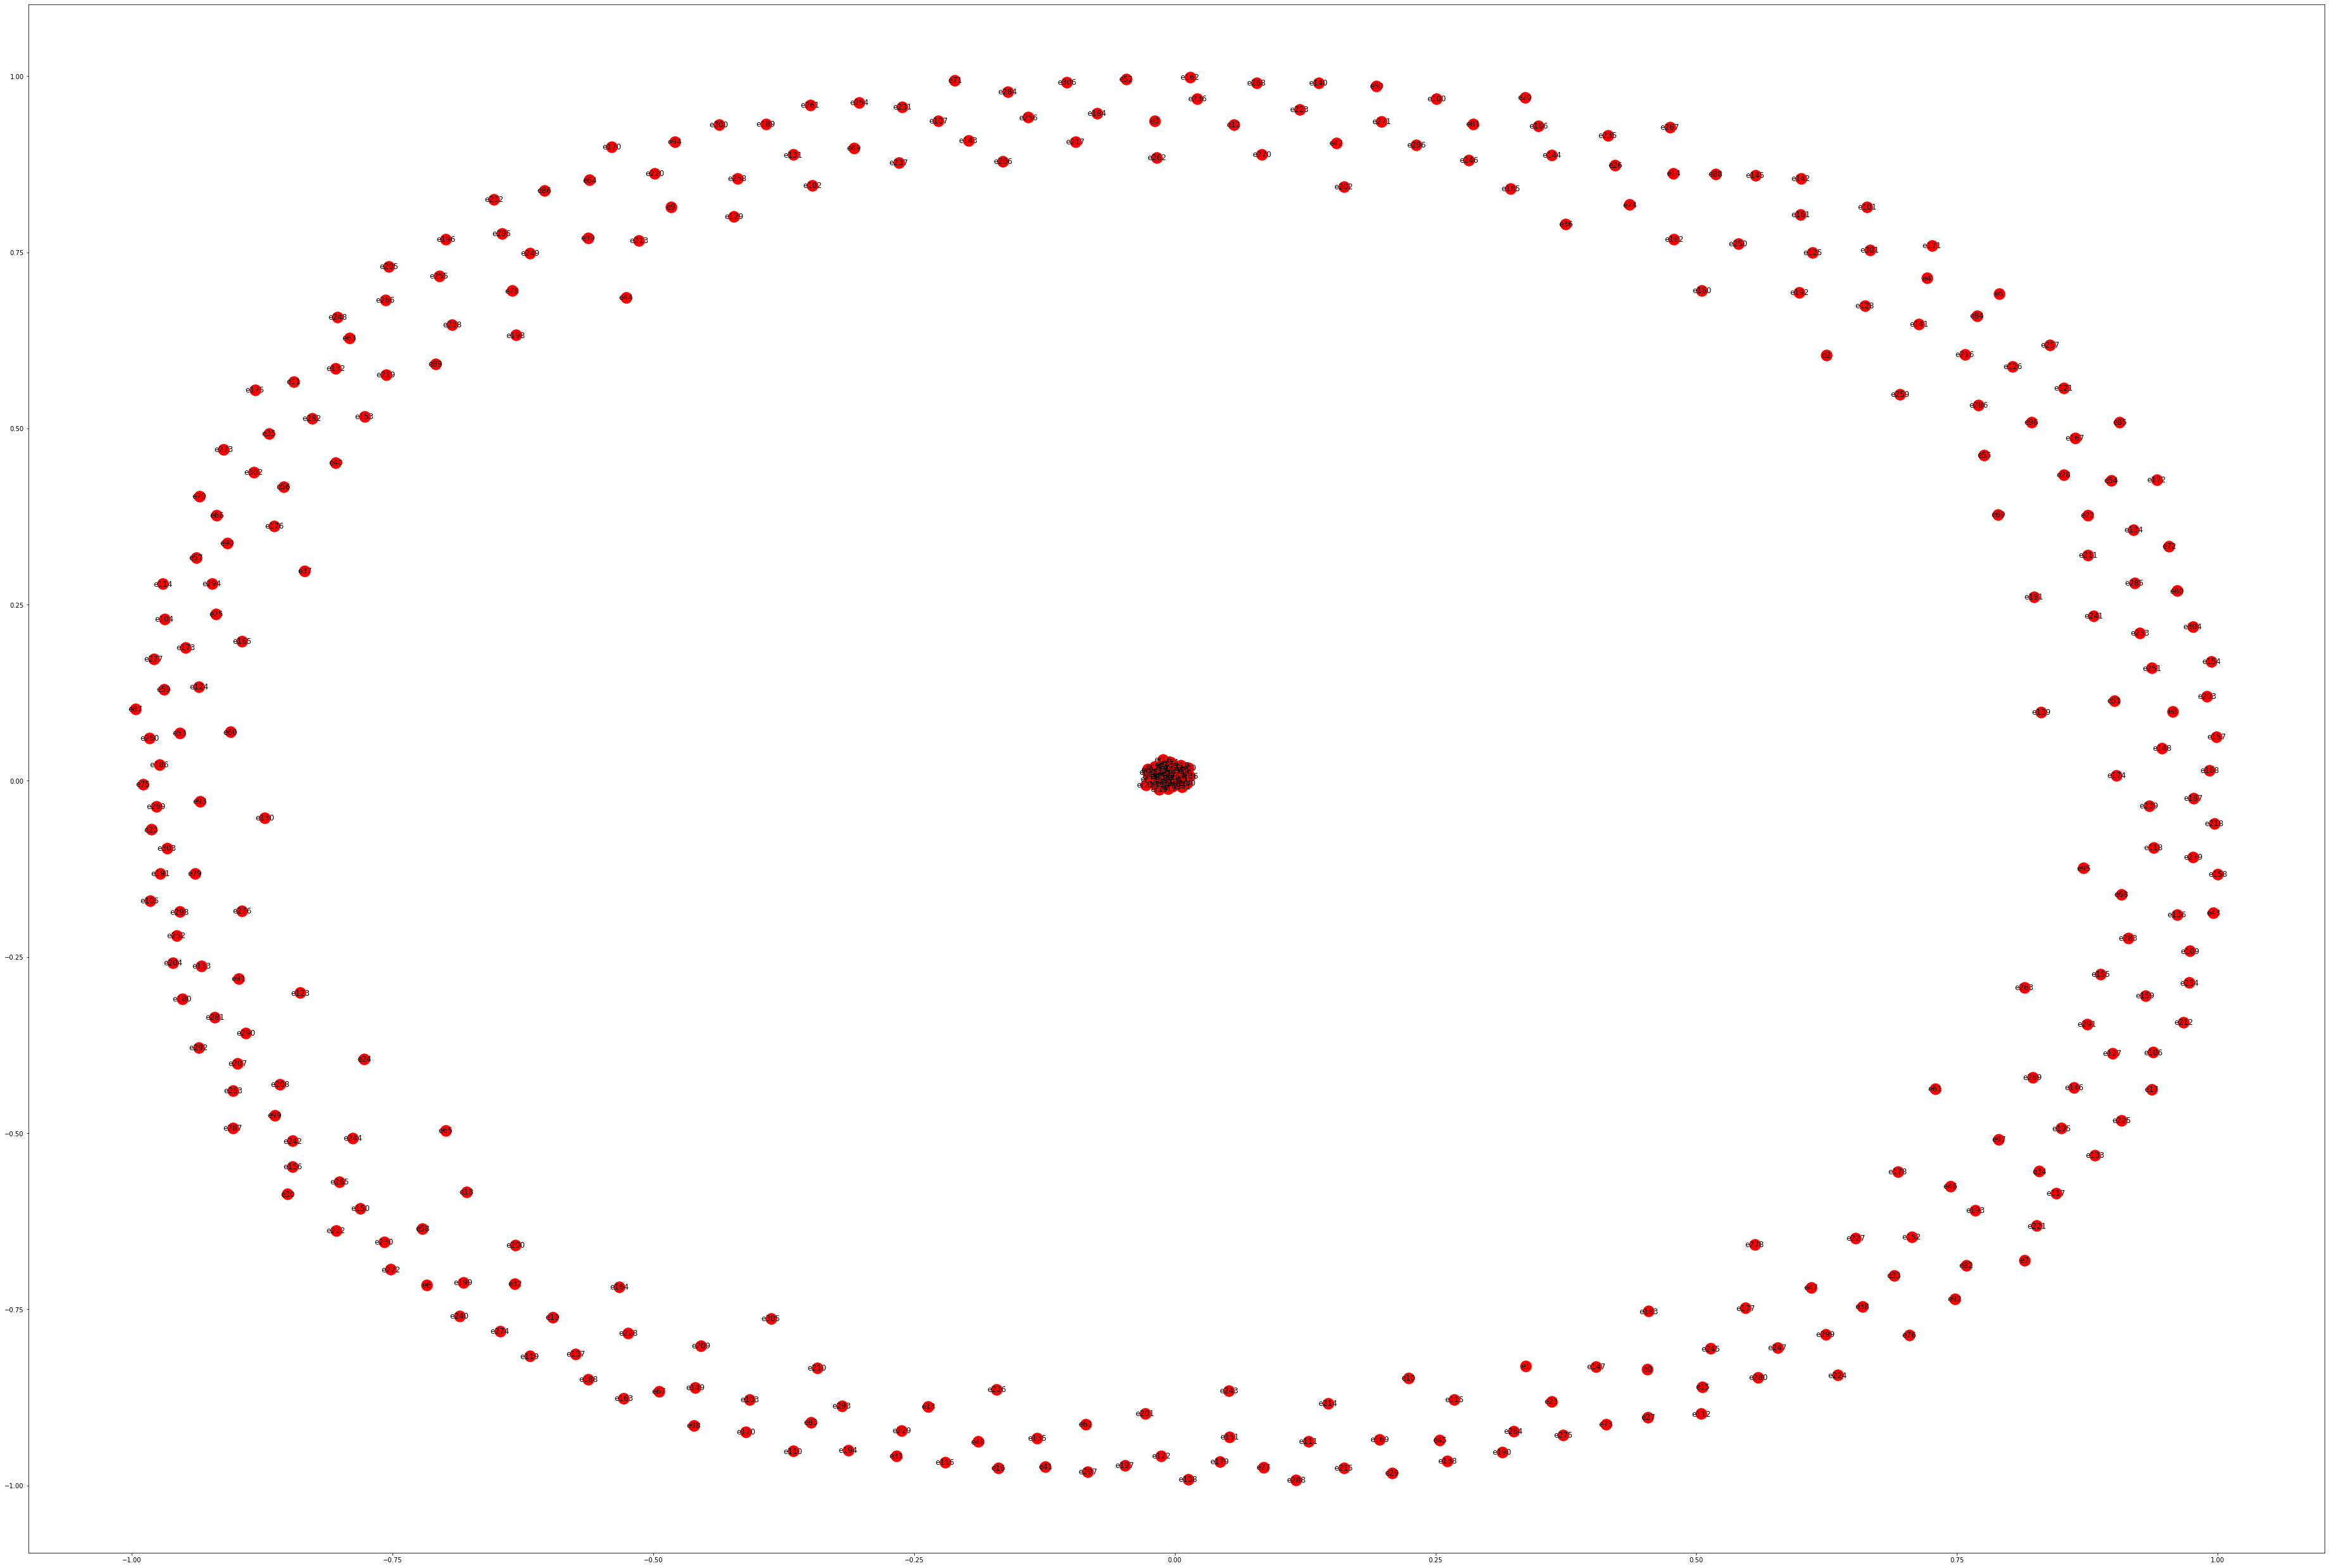

In [87]:
plot_graph(G_union_feature)

### Citation Graph

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


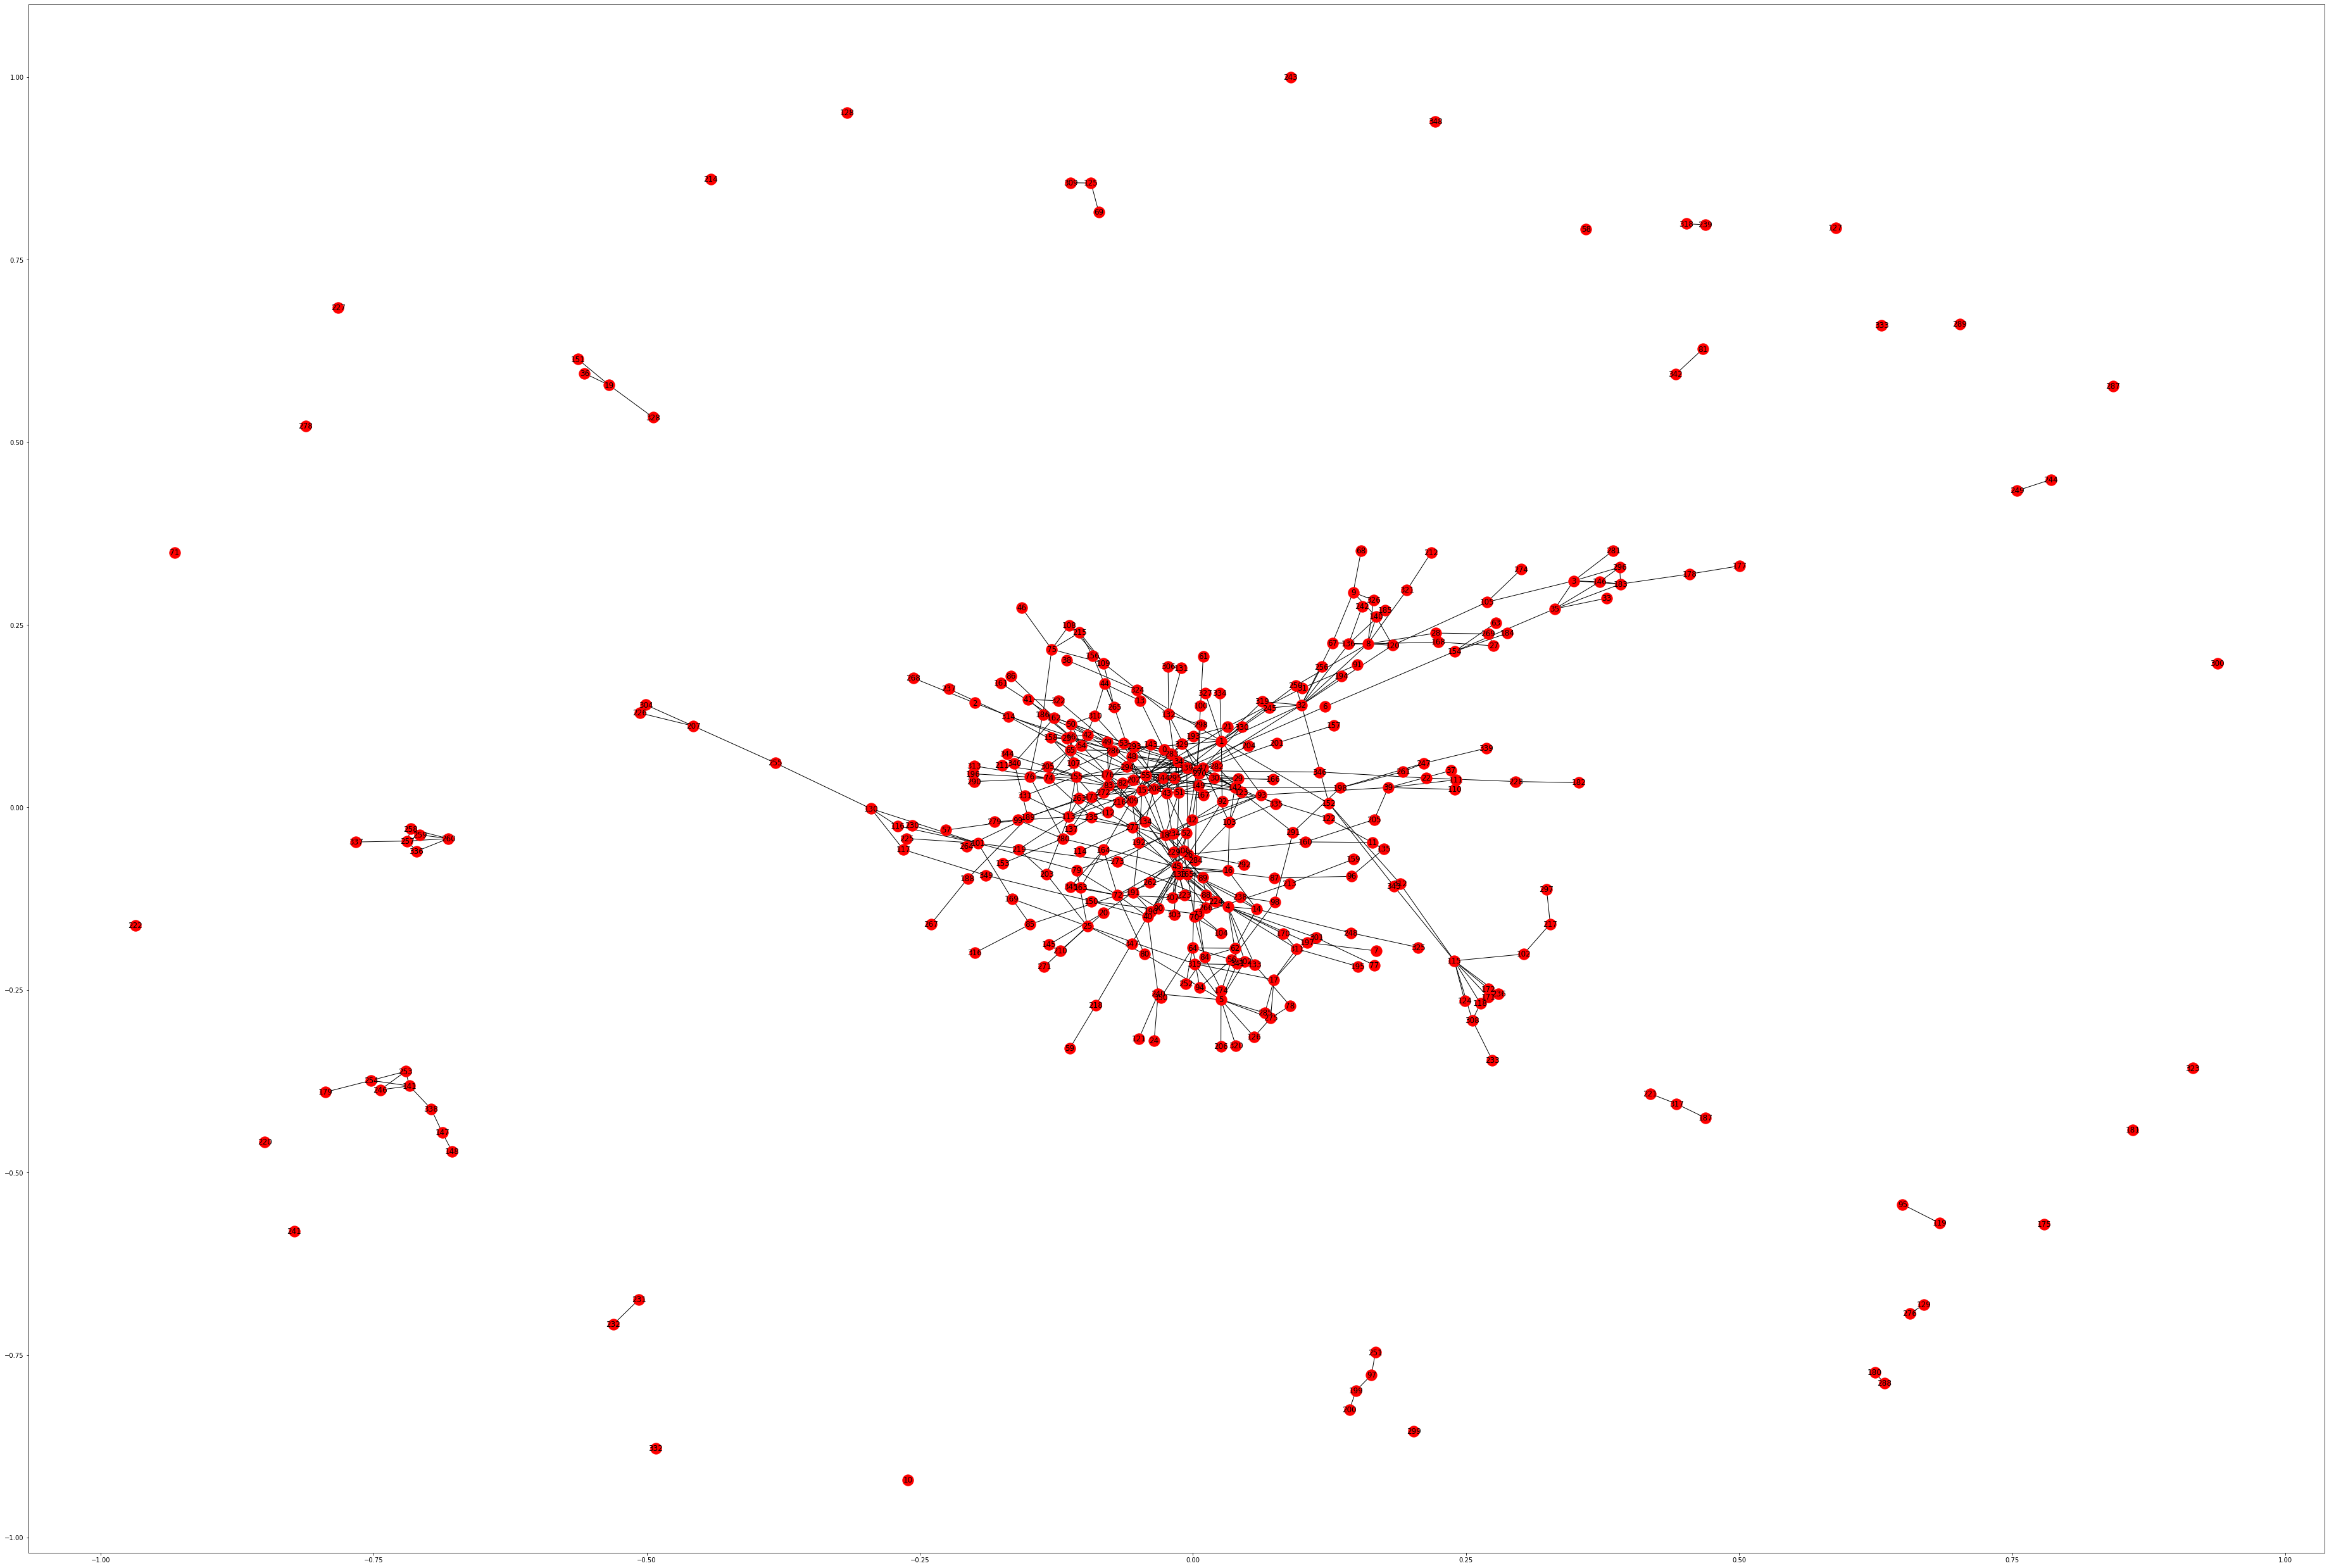

In [88]:
plot_graph(G_citation)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


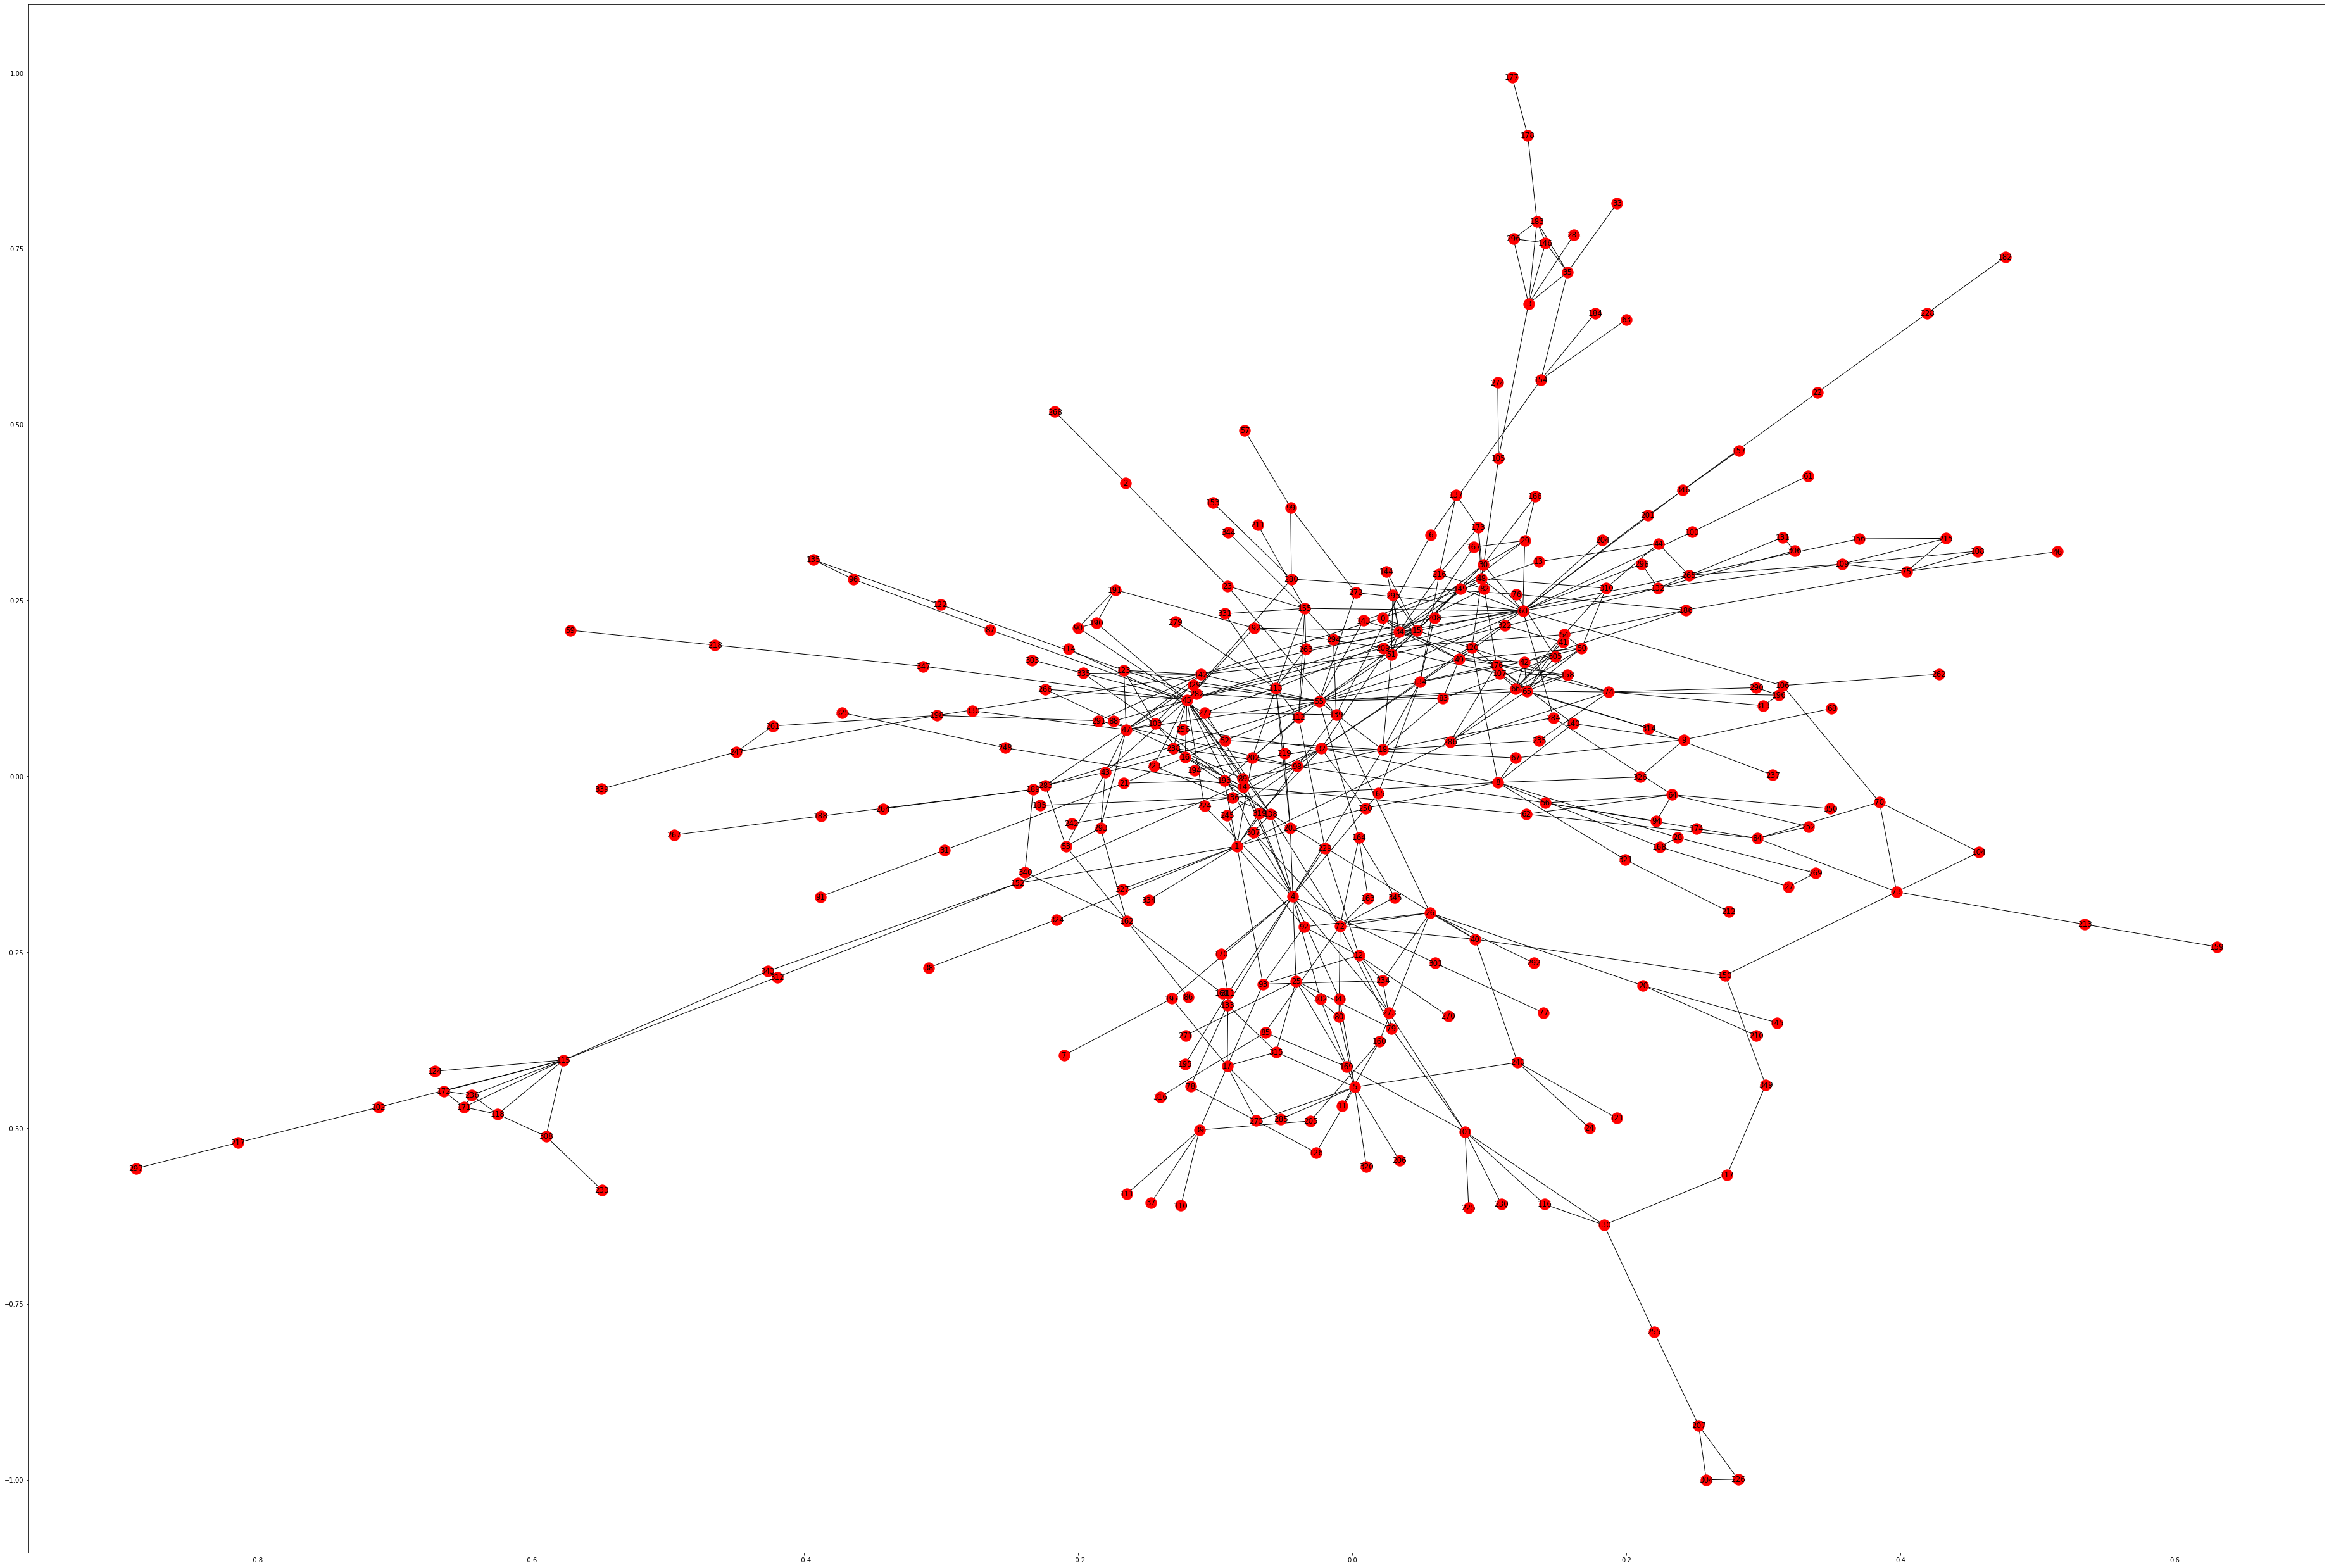

In [89]:
plot_graph(giant_citation)

Clustering coefficient:  0.18770089651844546
Number of edges:  600


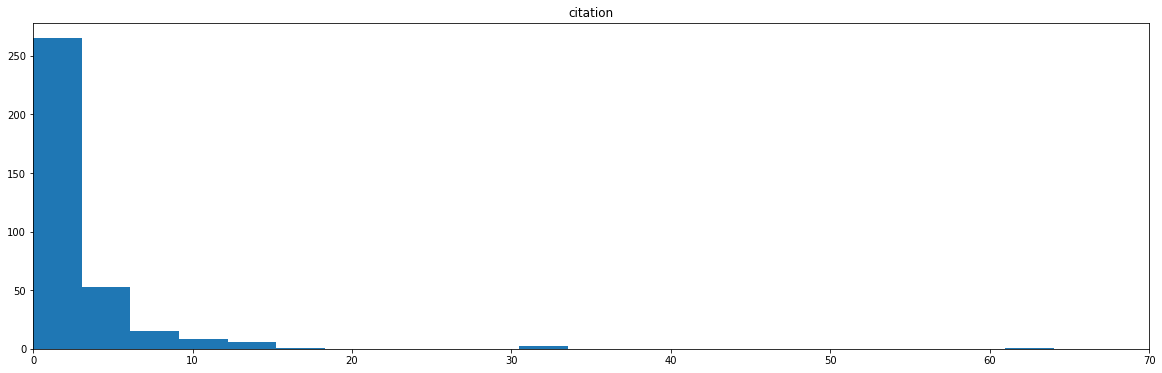

In [90]:
def better_model_for_citation(G_citation):
    number_nodes_with_zero_degree = (G_citation.number_of_nodes() - np.count_nonzero(np.array(list(dict(G_citation.degree).values()))))
#     G_empty_citation = nx.empty_graph(number_nodes_with_zero_degree)
    G_empty_citation = nx.erdos_renyi_graph(G_citation.number_of_nodes() - giant_citation.number_of_nodes(), 0.015)
    G_pccitation = nx.powerlaw_cluster_graph(giant_citation.number_of_nodes(), 2, 0.23)
    G_union_citation = nx.union(G_empty_citation, G_pccitation, rename=("e", "pc"))
    return G_union_citation

G_union_citation = better_model_for_citation(G_citation)
plot_degree_distribution_clustering(G_union_citation, "citation", bin_size=3)

Clustering coefficient:  0.19443820911432247
Number of edges:  534


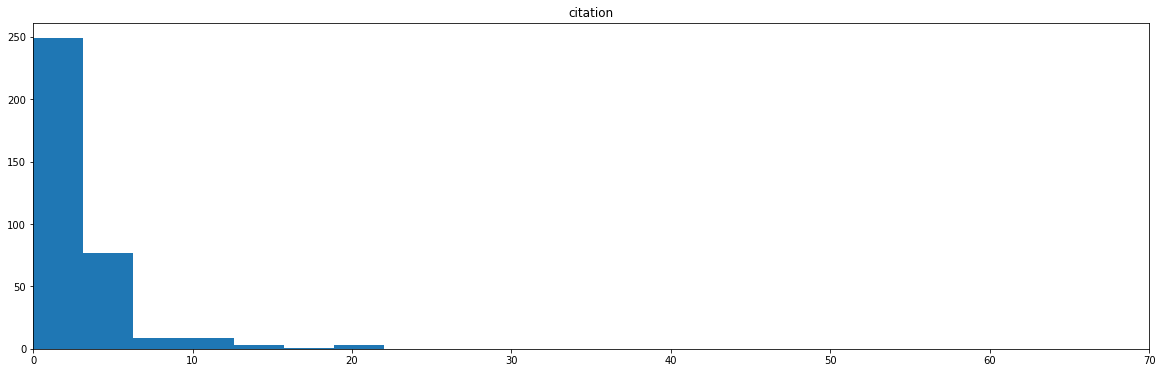

In [91]:
plot_degree_distribution_clustering(G_citation, "citation", bin_size=3)

Let's see with bin size of 1 if the distribution really match closely.

Clustering coefficient:  0.18770089651844546
Number of edges:  600


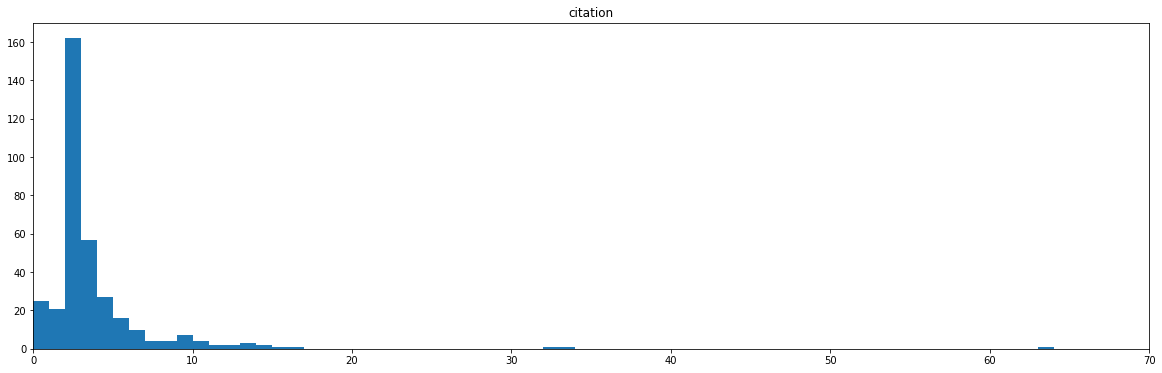

In [92]:
plot_degree_distribution_clustering(G_union_citation, "citation", bin_size=1)

Clustering coefficient:  0.19443820911432247
Number of edges:  534


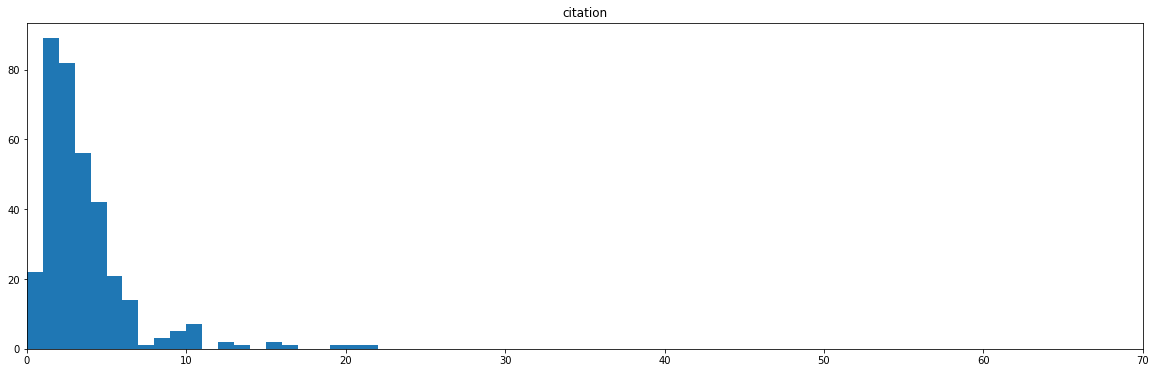

In [93]:
plot_degree_distribution_clustering(G_citation, "citation", bin_size=1)

Comment on the similarities of your match.

**The custom model for the feature graph fits both the average clustering coefficients and the degree distribution well, or at least it is more similar than the previous ER and BA models. Thus, it confirms our expectation justified in the previous question.**

**For the citation graph we had more problems to find a good fitting model. That is because it looks like the giant component is following a power law so we tried to fit the power law clustering graph model by matching the clustering coefficient. We also modeled the low degrees using a low connecting probability Erdos-Reyni model. The general behaviour looks similar, however when we try to zoom in the degree distribution doesn't match perfectly, especially the low degree nodes, in particular degree 1. This is because the power law associates 2 edges for each node. Nontheless the degree distribution and the cluster coefficient are closer to the citation graph distribution and coefficient respectively.**